<a href="https://colab.research.google.com/github/AsmaBenHmidene/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures.

heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body.Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values, which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise undetectable by medical doctors.

Machine learning, in particular, can predict patients’ survival from their data and can individuate the most important features among those included in their medical records.

Our data is a CSV file having 12 attributes. Below is in detail about each:

- Age: Age of the patient [years]

- Sex: Sex of the patient [M: Male, F: Female]

- ChestPainType: Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- RestingBP: Resting blood pressure [mm Hg]

- Cholesterol: Serum cholesterol [mm/dl]

- FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

- RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]

- ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

- Oldpeak: Oldpeak = ST [Numeric value measured in depression]

- ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

- heartDisease: Output class [1: heart disease, 0: Normal]

data source: Kaggle [heart failure prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath ='/content/drive/MyDrive/Projects/Heart-disease-prediction/heart.csv'
df = pd.read_csv(filepath)
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 1) Duplicates:

In [ ]:
df.duplicated().sum()

0

### 2) NaN values:

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 3) Type info:

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### 4) Impossible values in numeric columns:

In [ ]:
df.select_dtypes('number').describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
num_columns= df.select_dtypes('number')
for column in num_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 2

Cholesterol and RestingBP can not be equal to 0.

Will study which is the best method to deal with this point after analysing the distribution of those features.

### 5) inconsistent values in categorical columns:

In [ ]:
object_columns= df.select_dtypes('object')
for column in object_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


### 6) Exploratory Visualizations:

#### histogram and boxplot of numerical features:

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

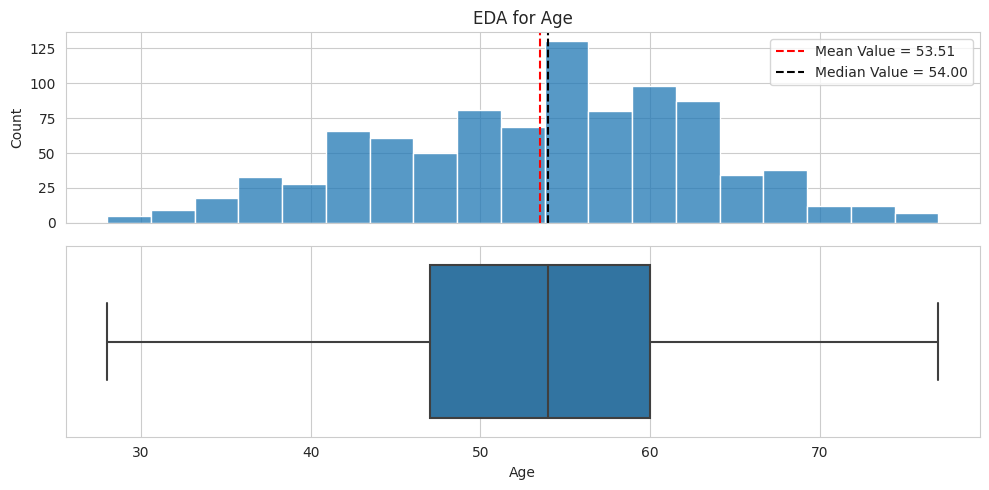

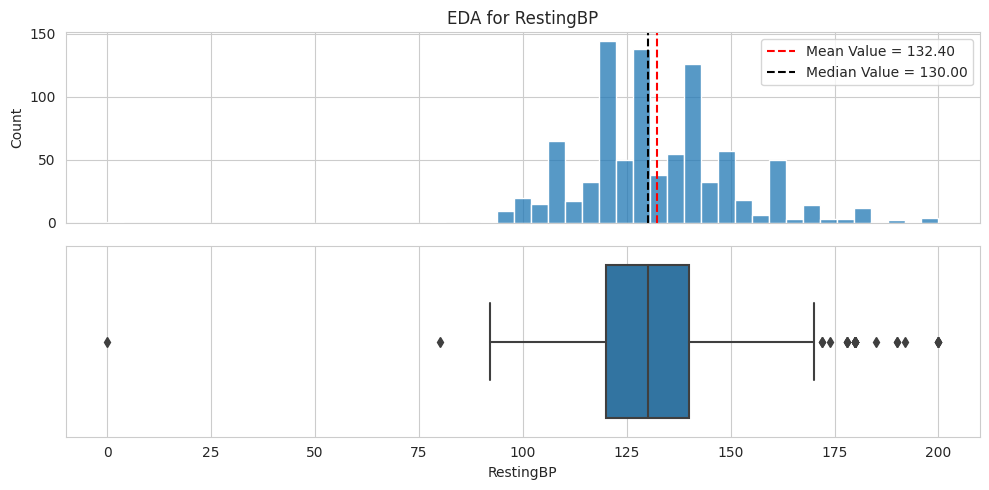

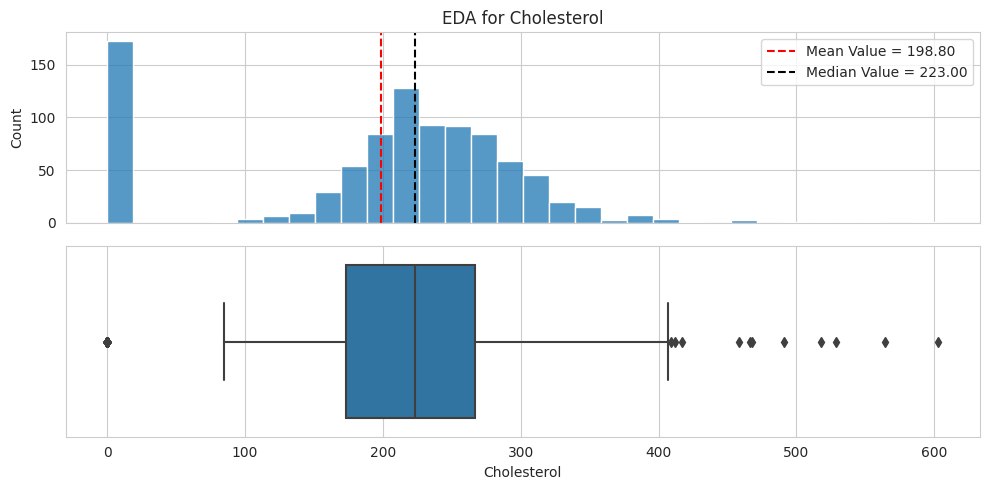

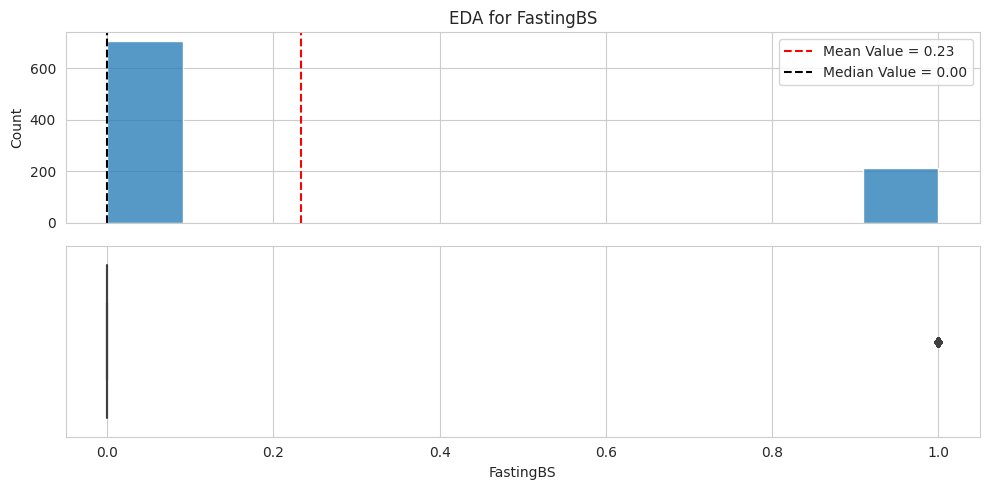

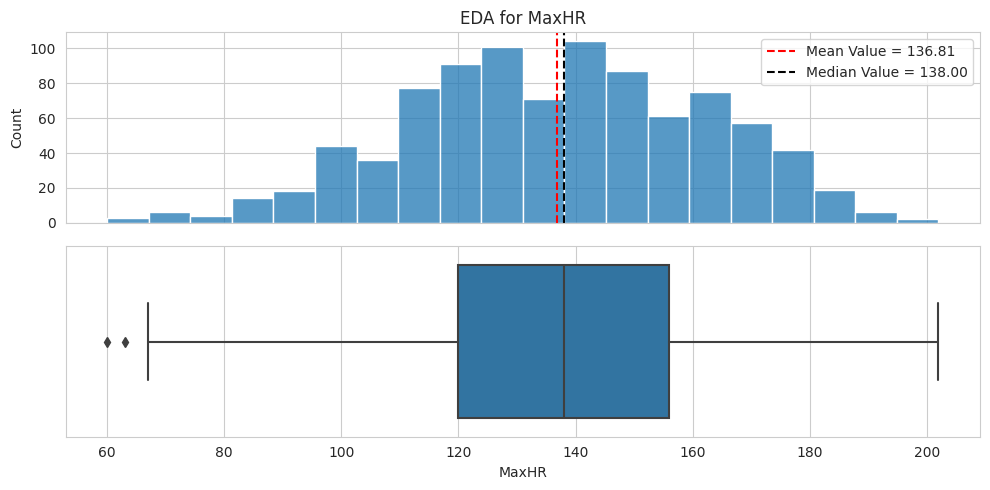

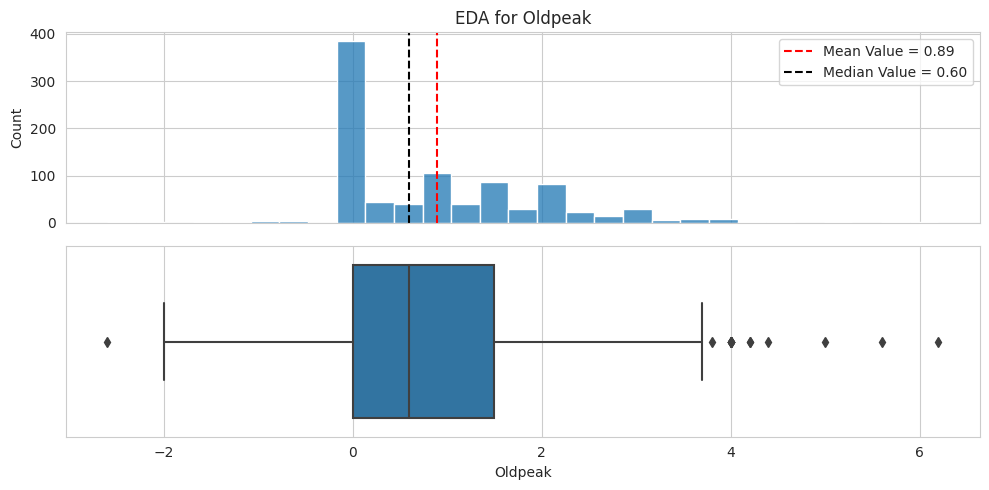

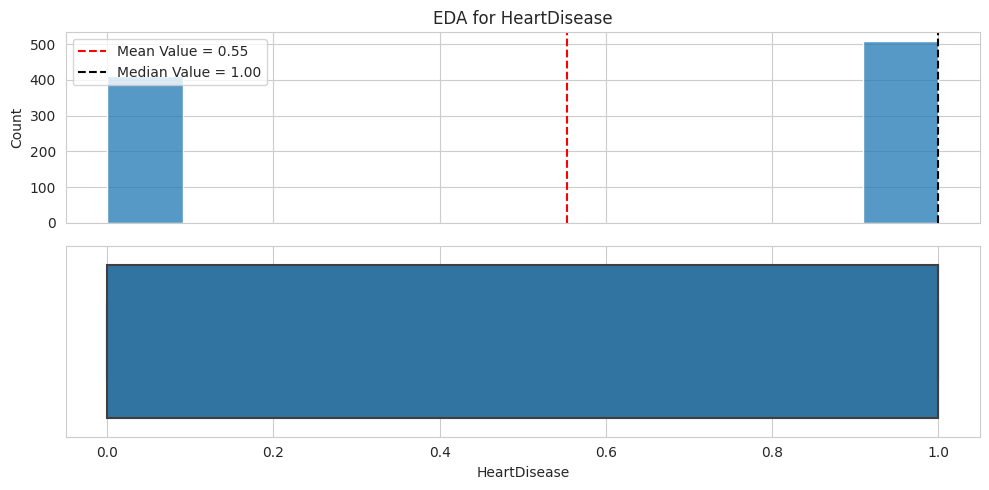

In [ ]:
num_columns= df.select_dtypes('number')
for columns in num_columns:
    plot_numeric(df,columns);

We can observe that there are outliers that need to be checked.

#### Outliers in numerical features:

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.

When to Remove Outliers in Data

An outlier is an observation that lies abnormally far away from other values in a dataset.
Outliers can be problematic because they can affect the results of an analysis.
However, they can also be informative about the data you’re studying because they can reveal abnormal cases or individuals that have rare traits.
In any analysis, you must decide to remove or keep outliers.

Fortunately, you can use the following flow chart to help you decide:

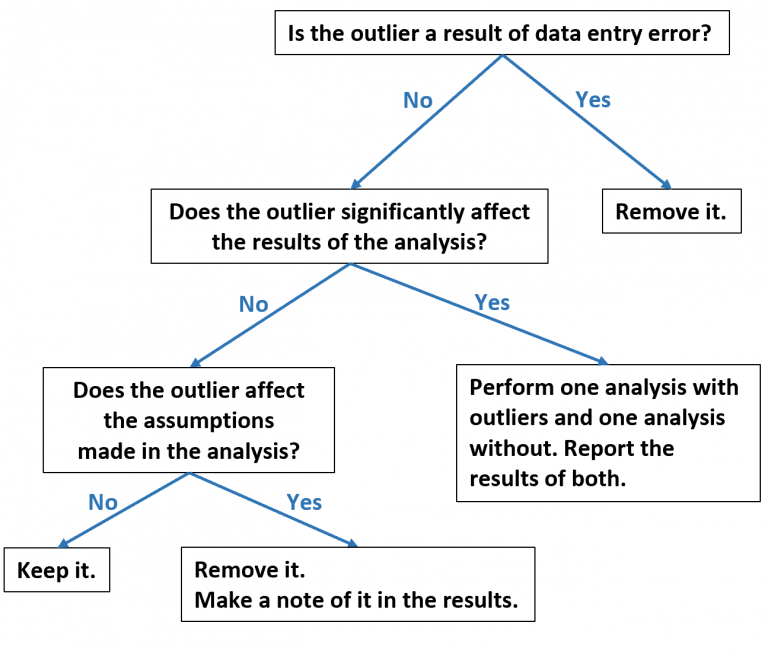


NOTE: it's a pretty delicate situation because it depends on the kind of experiment you are making and the data you are dealing with , but generally speaking you can replace the data with something more reasonable also some outliers may carry important information or represent genuine anomalies in the data, while others may be measurement errors or data entry errors. you can extrapolate the values with the help of clustering algorithms, depending on the data distribution of course.  you can remove the outlier data if it is far from the mean (for a normal distrbution you can check data that is around 5 or 6 X standard deviation).
and also you can try transformations like winsorizing https://en.wikipedia.org/wiki/Winsorizing

Different outlier detection technique.

- Hypothesis Testing
- Z-score method
- Robust Z-score
- I.Q.R method
- Winsorization method(Percentile Capping)
- DBSCAN Clustering
- Isolation Forest
- Visualizing the data
- IQR method is used in this project

In this method by using Inter Quartile Range(IQR), we detect outliers.

IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers.

Q1 represents the 1st quartile/25th percentile of the data.

Q2 represents the 2nd quartile/median/50th percentile of the data.

Q3 represents the 3rd quartile/75th percentile of the data.

(Q1–1.5*IQR) represent the smallest value in the data set and
(Q3+1.5*IQR) represnt the largest value in the data set.

In [ ]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

Cholesterol     331.3
MaxHR            82.0
RestingBP        54.0
Age              31.0
Oldpeak           3.0
FastingBS         1.0
HeartDisease      1.0
dtype: float64

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

We will assume that O means that the Cholesterol and RestingBP  were not recorded for some patients.

The distribution of botn features is skewed so we will replace the missing value with the median.

We will Find the number of patients whose cholesterol is not recorded to decide whether to remove records with missing values or not.

The same thing will be done for RestingBP.

In [ ]:
n_patients = len(df[df['Cholesterol'] == 0])
print(f'Patients for whom cholesterol is not recorded: {n_patients} == Equivalent to {100 * n_patients / len(df):.2f}% of the dataset')

Patients for whom cholesterol is not recorded: 171 == Equivalent to 18.65% of the dataset


IQR method did not remove the 0 outlier, so, we will try replace the 0 with median value.

In [ ]:
M = df.loc[(df['Cholesterol'] != 0) & (df['Sex'] == 'M'), 'Cholesterol'].median()
M

234.0

In [ ]:
F = df.loc[(df['Cholesterol'] != 0) & (df['Sex'] == 'F'), 'Cholesterol'].median()
F

248.0

In [ ]:
# Fill cholesterol for patients whose cholesterol is not recorded -> strategy: mean
# Calculate the mean cholesterol for male and female separately and replace the 0s in the data

df_filled = df.copy()

df.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'M'), 'Cholesterol'] = M

df.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'F'), 'Cholesterol'] = F

In [ ]:
df['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

In [ ]:
n_patients1 = len(df[df['RestingBP'] == 0])
print(f'Patients for whom cholesterol is not recorded: {n_patients1} == Equivalent to {100 * n_patients1 / len(df):.2f}% of the dataset')

Patients for whom cholesterol is not recorded: 0 == Equivalent to 0.00% of the dataset


IQR method did remove the 0 outlier.

In [ ]:
df.select_dtypes('number').describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  917.000000  917.000000   917.000000  917.000000  917.000000   
mean    53.509269  132.540894   242.820065    0.233370  136.789531   
std      9.437636   17.999749    53.502431    0.423206   25.467129   
min     28.000000   80.000000    85.000000    0.000000   60.000000   
25%     47.000000  120.000000   214.000000    0.000000  120.000000   
50%     54.000000  130.000000   234.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  917.000000    917.000000  
mean     0.886696      0.552890  
std      1.066960      0.497466  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

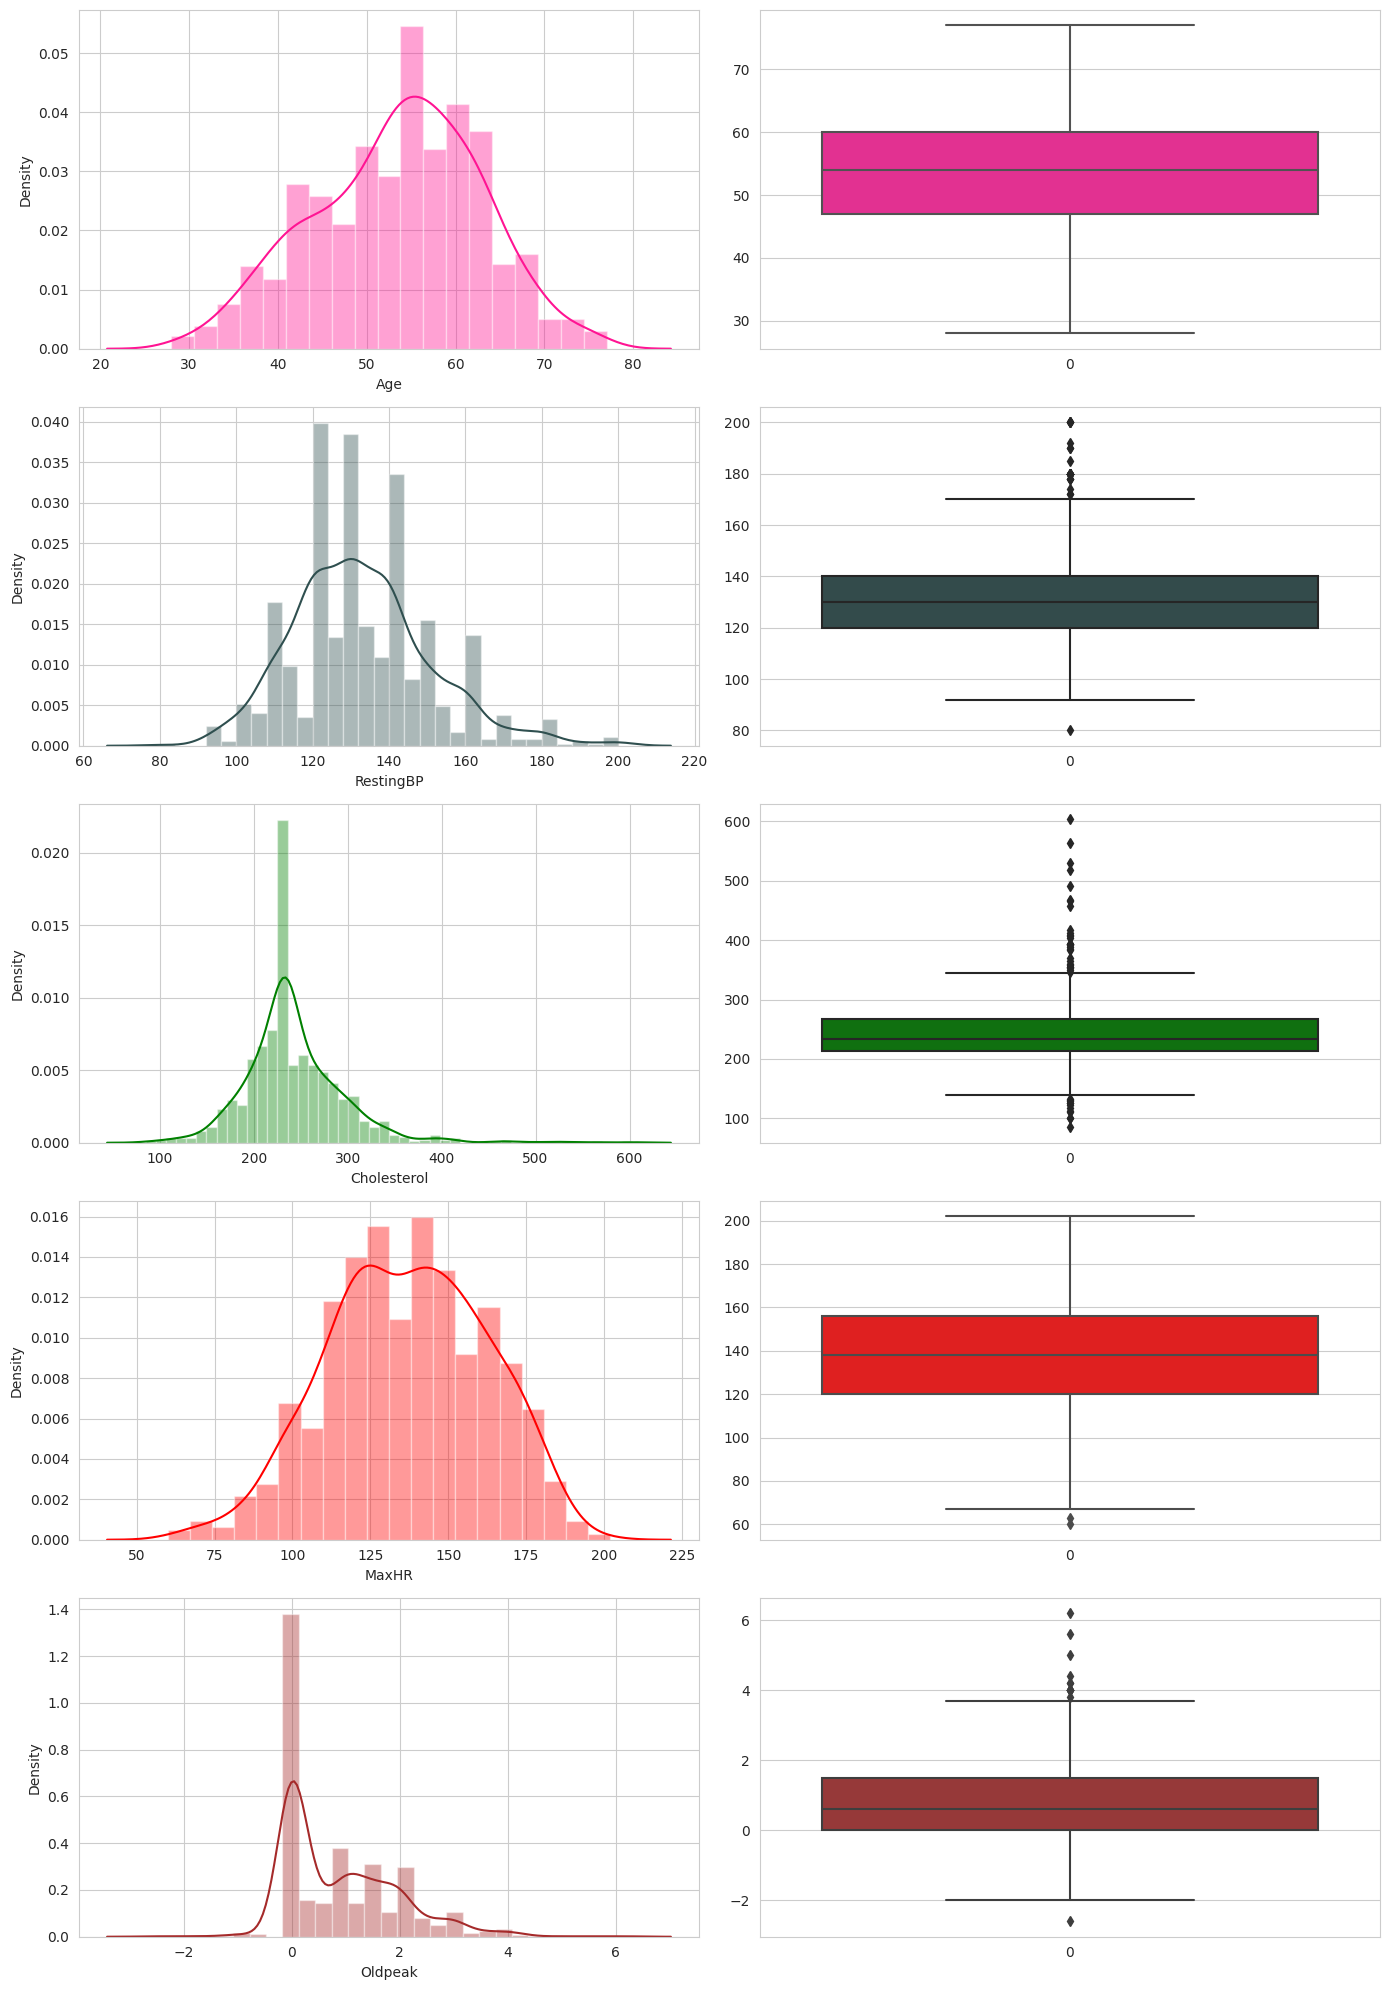

In [ ]:
plt.figure(figsize=(14,20))

plt.subplot(5,2,1)
sns.distplot(df['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(df['Age'],color='DeepPink')

plt.subplot(5,2,3)
sns.distplot(df['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(df['RestingBP'],color='DarkSlateGray')

plt.subplot(5,2,5)
sns.distplot(df['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(df['Cholesterol'],color='Green')

plt.subplot(5,2,7)
sns.distplot(df['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(df['MaxHR'],color='Red')

plt.subplot(5,2,9)
sns.distplot(df['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(df['Oldpeak'],color='Brown')

plt.tight_layout()
plt.show()

#### Barplot of categorical features:

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

M    724
F    193
Name: Sex, dtype: int64
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    546
Y    371
Name: ExerciseAngina, dtype: int64
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64


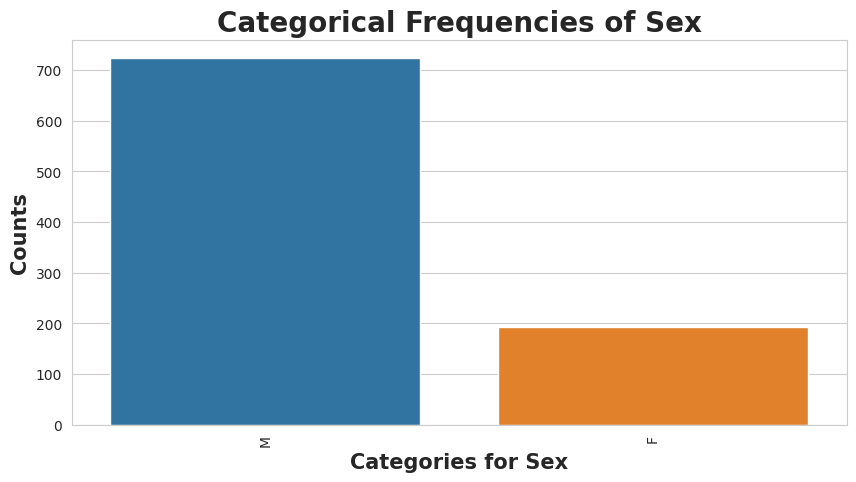

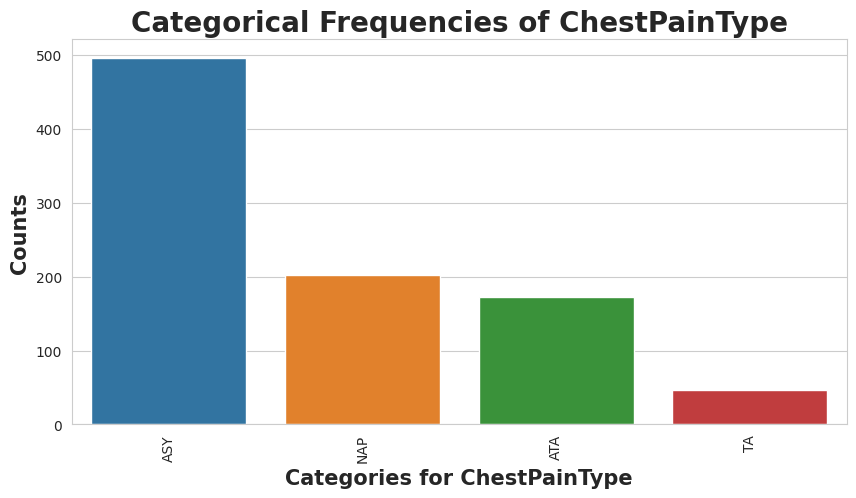

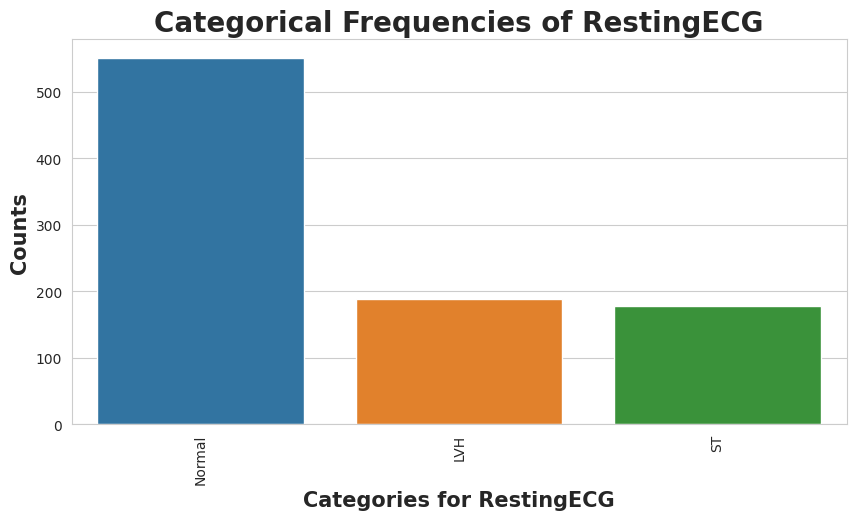

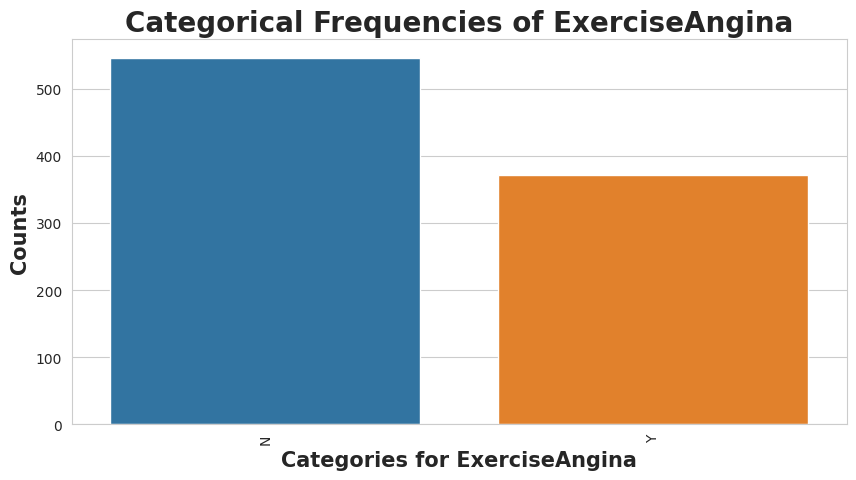

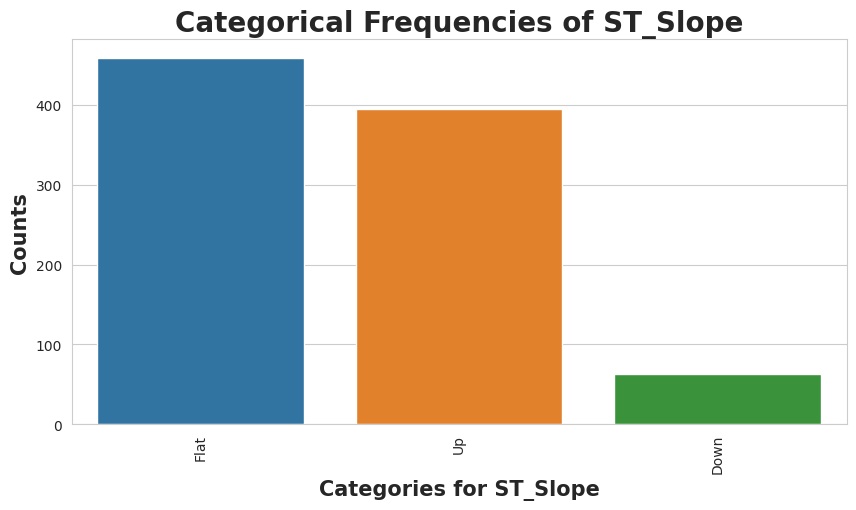

In [ ]:
object_columns= df.select_dtypes('object')
for column in object_columns:
    print('==============================')
    fig, ax = plot_bar(df, column, column);
    print(df[column].value_counts())

### 8) Features engineering:

#### 8-1) RestingBP: classification:

A total blood pressure reading is determined by measuring the systolic and diastolic blood pressures.

Systolic blood pressure measures the force the df exerts on the walls of the arteries each time it beats.

CrossDiastolic blood pressure measures the force the df exerts on the walls of the arteries in between beats.

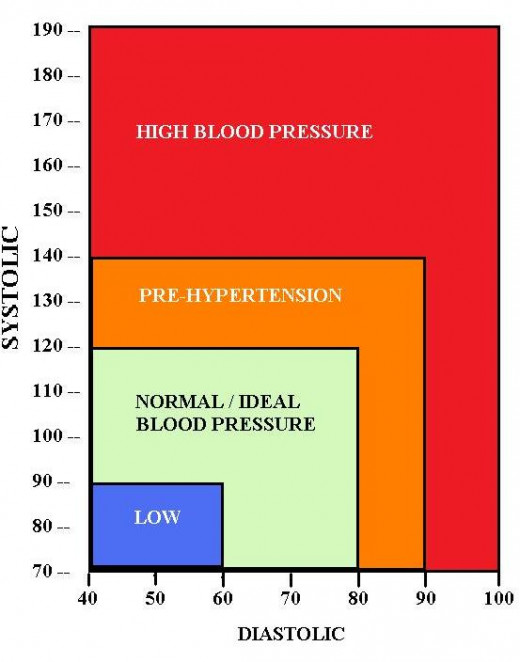

In this dataset, there is no seprate columns are provided for Systolic and Diastolic Blood Pressure.

Taking into consideration that our data show a min = 80 and max = 200 in RestingBP column, we will conclude that our data represent systolic BP values.

Then, we will divide our data into categories according to the following chart:
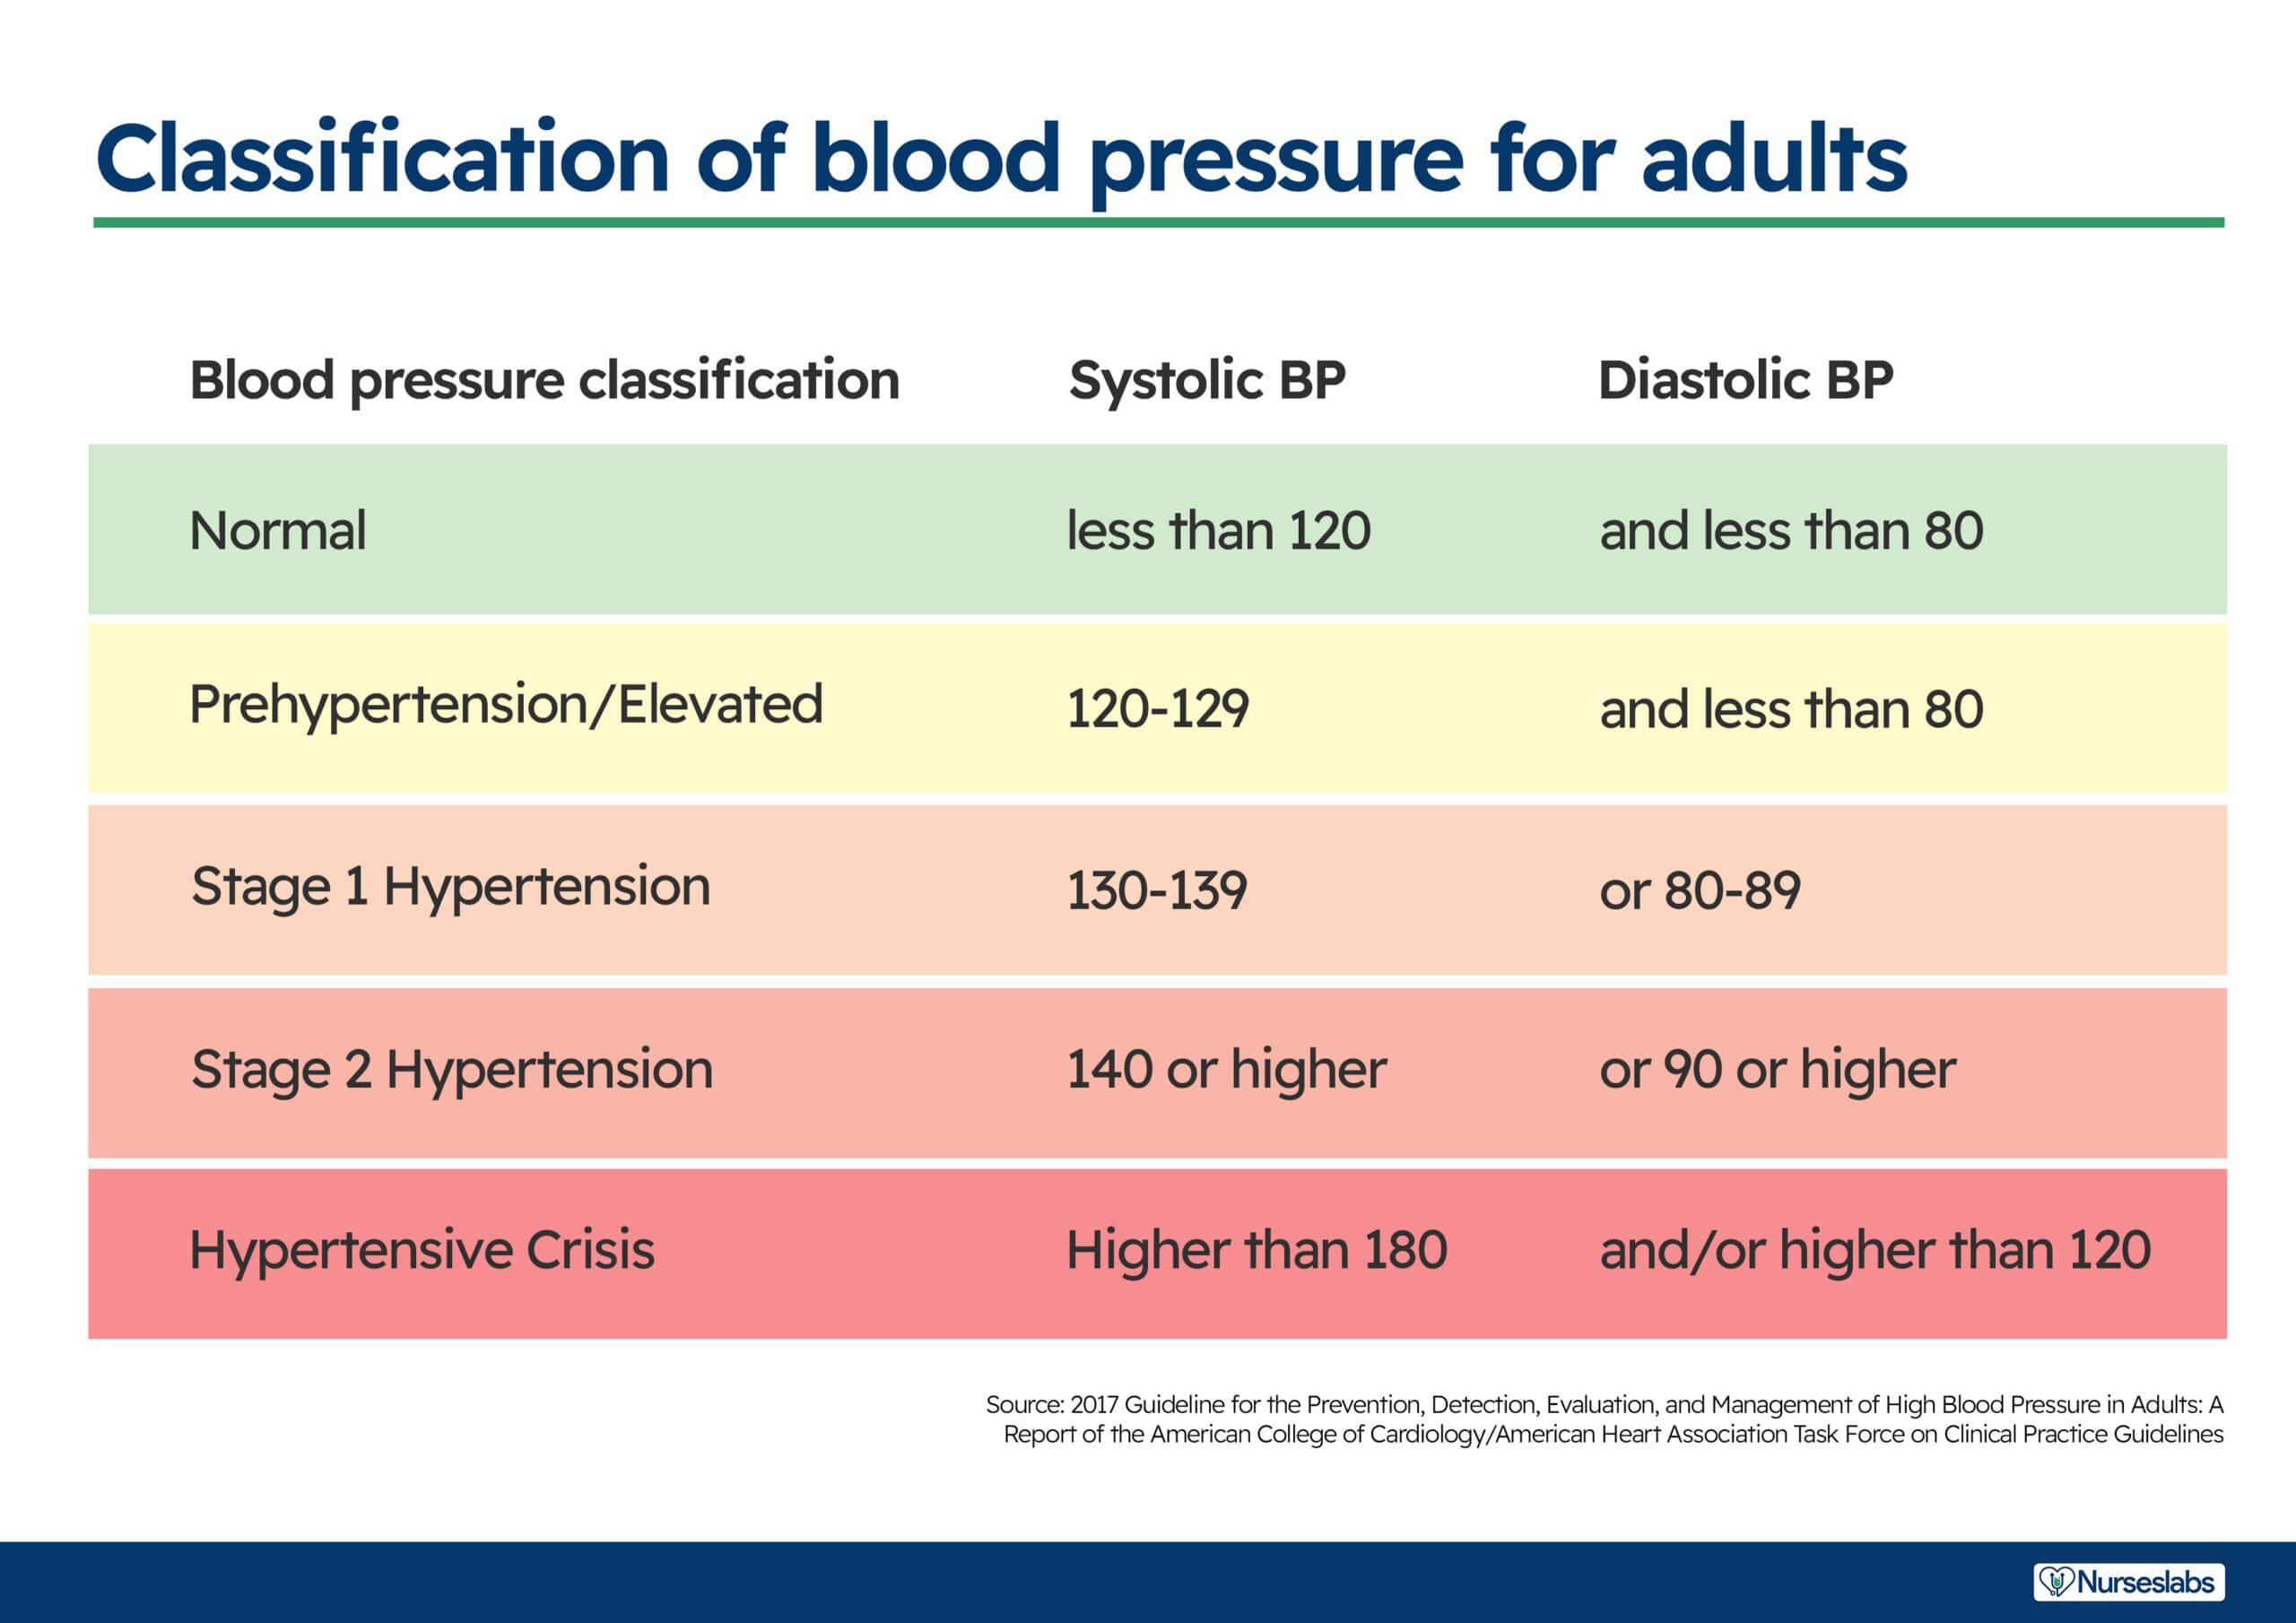

In [ ]:
df["RestingBP_Category"]= pd.cut(df["RestingBP"] ,bins=[0,120,129,139,180,200] ,labels=["Normal_BP","Elevated_BP","Hypertension_Stage_1","Hypertension_Stage_2","Hypertensive_Crisis"] )
print("Value Counts :\n\n",df['RestingBP_Category'].value_counts())

df.sample(5)

Value Counts :

 Hypertension_Stage_2    319
Normal_BP               292
Hypertension_Stage_1    216
Elevated_BP              82
Hypertensive_Crisis       8
Name: RestingBP_Category, dtype: int64


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
102   40   F           ASY        150          392          0     Normal   
59    52   M           ASY        112          342          0         ST   
407   62   M           ASY        115          234          1     Normal   
808   35   M           ASY        126          282          0        LVH   
546   48   M           NAP        132          220          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
102    130              N      2.0     Flat             1   
59      96              Y      1.0     Flat             1   
407     72              Y     -0.5     Flat             1   
808    156              Y      0.0       Up             1   
546    162              N      0.0     Flat             1   

       RestingBP_Category  
102  Hypertension_Stage_2  
59              Normal_BP  
407             Normal_BP  
808           Elevated_BP  
546  Hypertension_Stage_1

In [ ]:
# converting from categorical variable to object type
df['RestingBP_Category'] = df['RestingBP_Category'].astype(object)

#### 8-2) Cholesterol level: classification:

The min age in our dataset is 28 years old, So, We will classify cholesterol level according to the following chart:

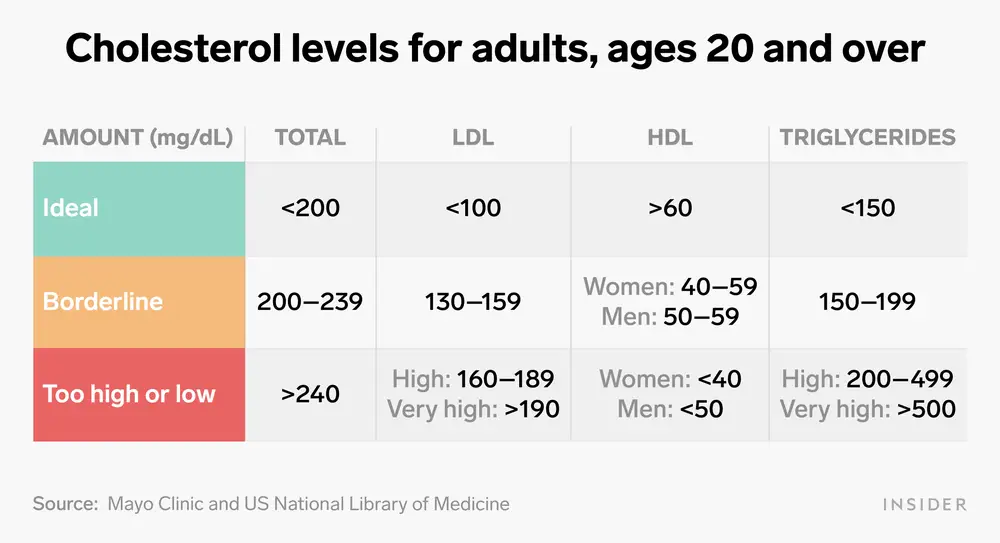

In [ ]:
df["Cholesterol"].max()

603

In [ ]:
df["Cholesterol_Category"]= pd.cut(df["Cholesterol"] ,bins=[0,200,239,570] ,labels=["Normal","Borderline","High"] )
print("Value Counts :\n\n",df['Cholesterol_Category'].value_counts())

df.head()

Value Counts :

 Borderline    393
High          373
Normal        150
Name: Cholesterol_Category, dtype: int64


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease    RestingBP_Category  \
0              N      0.0       Up             0  Hypertension_Stage_2   
1              N      1.0     Flat             1  Hypertension_Stage_2   
2              N      0.0       Up             0  Hypertension_Stage_1   
3              Y      1.5     Flat             1  Hypertension_Stage_1   
4              N      0.0       Up             0  Hypertension_Stage_2   

  Cholesterol_Category  
0                 High  
1               Normal  
2                 High  
3           Borderline  
4               Normal

In [ ]:
# converting from categorical variable to object type
df['Cholesterol_Category'] = df['Cholesterol_Category'].astype(object)

In [ ]:
df.isna().sum()

Age                     0
Sex                     0
ChestPainType           0
RestingBP               0
Cholesterol             0
FastingBS               0
RestingECG              0
MaxHR                   0
ExerciseAngina          0
Oldpeak                 0
ST_Slope                0
HeartDisease            0
RestingBP_Category      0
Cholesterol_Category    1
dtype: int64

we will impute the missing value with the most frequent category during the pre_processing step.

### 9) Analyses of features (EDA):

#### Percentage of Sick and Healthy people:

In [ ]:
df['HeartDisease'].value_counts()

1    507
0    410
Name: HeartDisease, dtype: int64

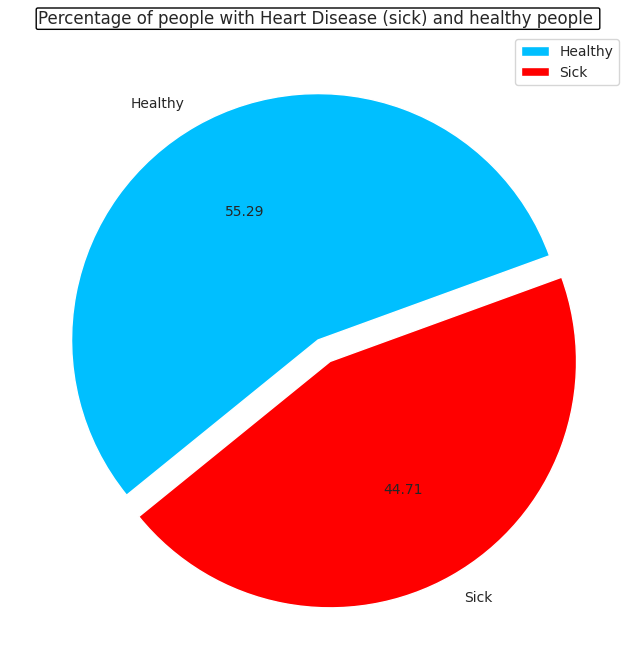

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x=df.HeartDisease.value_counts(),
        labels=['Healthy','Sick'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.1]
       );
plt.legend();
plt.title("Percentage of people with Heart Disease (sick) and healthy people ", bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'pad': 0.1})
plt.show();

From the chart pie, we can observe that our dataset is fairly balanced: 45% are reported to be sich Vs 55% are healthy.

#### Distribution of patient with heart disease based on Age:

In [ ]:
sick_df = df[df.HeartDisease == 1]

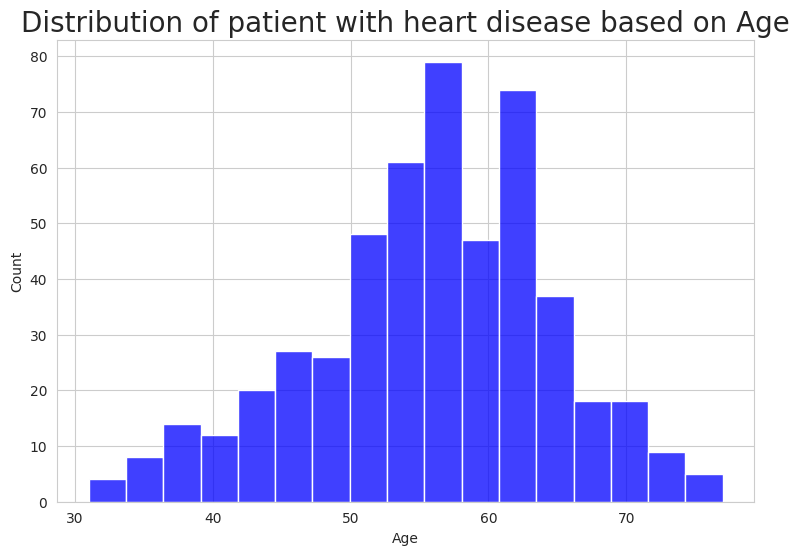

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x='Age',data=sick_df,color='blue')
plt.title("Distribution of patient with heart disease based on Age",{'fontsize':20});

#### Distribution of patients according to their age, gender and health condition:   

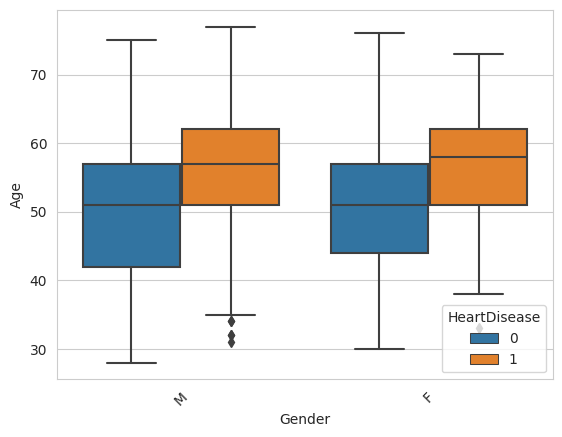

In [ ]:
sns.boxplot(data=df, x='Sex', y="Age", hue='HeartDisease');
plt.ylabel('Age')
plt.xlabel('Gender')
plt.xticks(rotation = 45);

#### Categorical Features vs Positive Heart Disease Cases:

In [ ]:
sex = sick_df['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = sick_df['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = sick_df['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = sick_df['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = sick_df['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = sick_df['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

RBP_Category = sick_df['RestingBP_Category'].value_counts()
RBP_Category = [RBP_Category[0] / sum(RBP_Category) * 100,RBP_Category[1] / sum(RBP_Category) * 100,RBP_Category[2] / sum(RBP_Category) * 100, RBP_Category[3] / sum(RBP_Category) * 100,RBP_Category[4] / sum(RBP_Category) * 100]

C_Category = sick_df['Cholesterol_Category'].value_counts()
C_Category = [C_Category[0] / sum(C_Category) * 100,C_Category[1] / sum(C_Category) * 100,C_Category[2] / sum(C_Category) * 100]

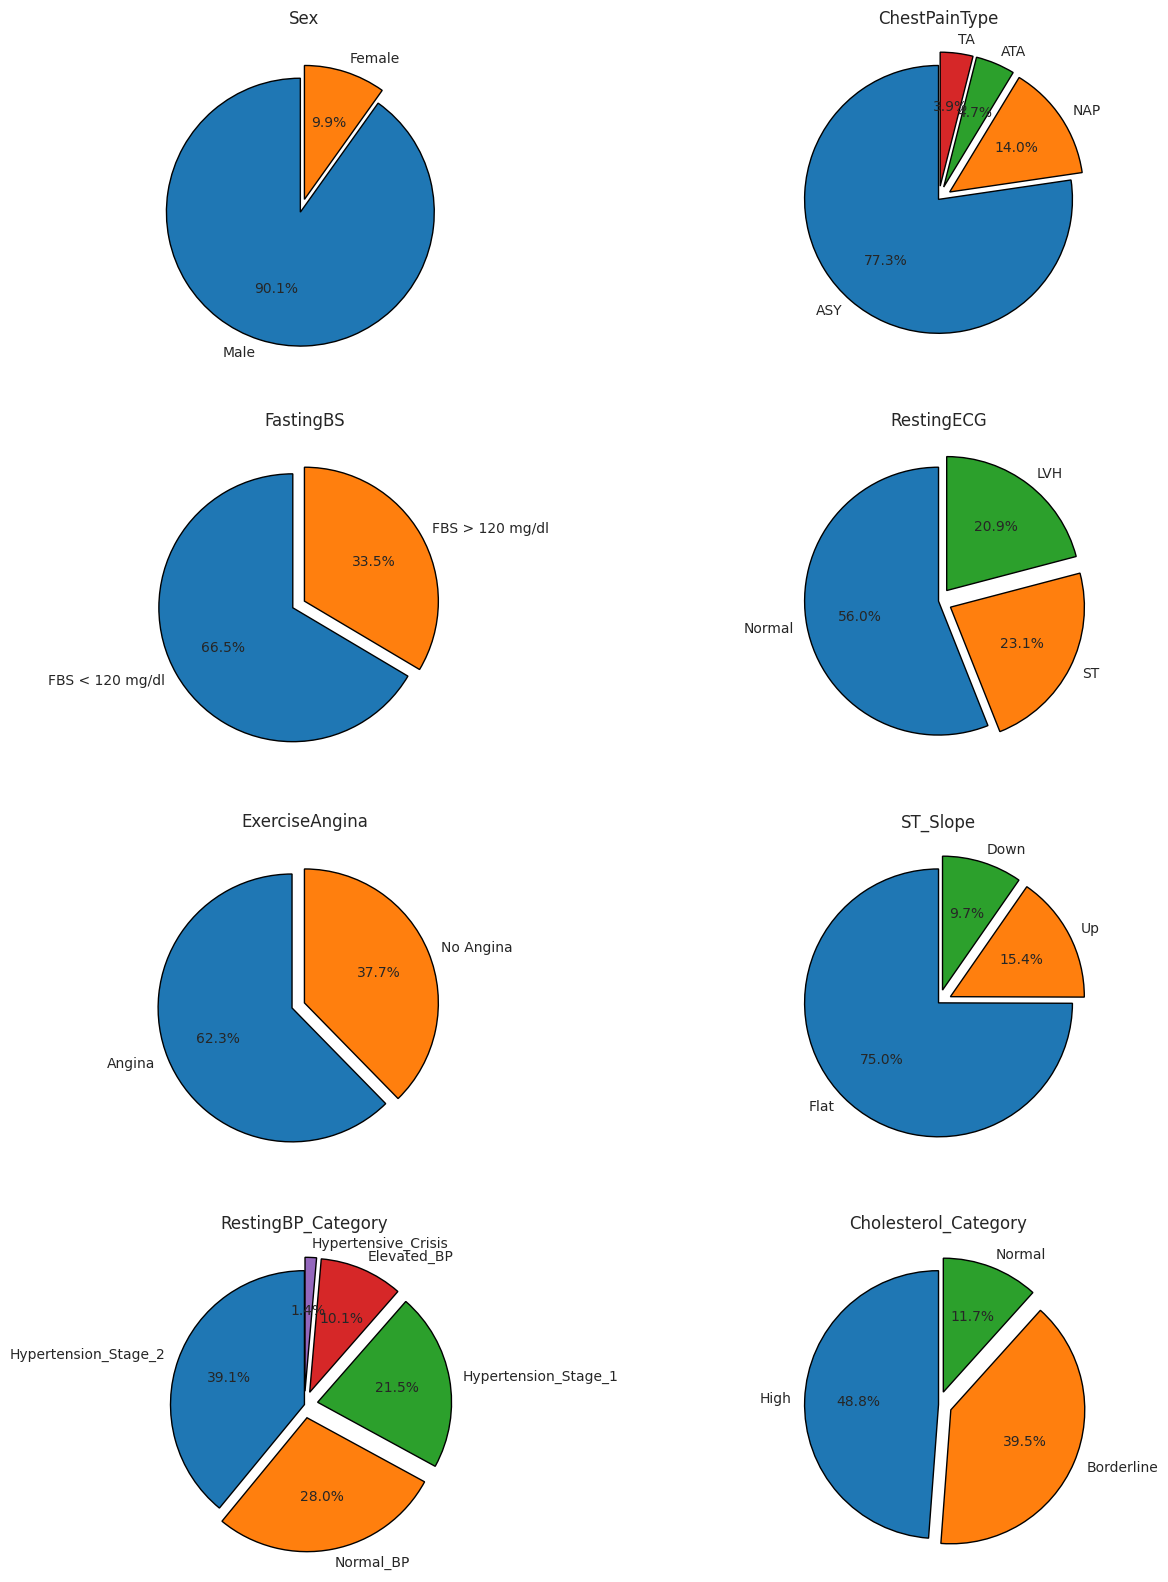

In [ ]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))

plt.subplot(4,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(4,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(4,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(4,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(4,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(4,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

plt.subplot(4,2,7)
plt.pie(RBP_Category,labels = ["Hypertension_Stage_2","Normal_BP","Hypertension_Stage_1","Elevated_BP","Hypertensive_Crisis"],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingBP_Category');

plt.subplot(4,2,8)
plt.pie(C_Category,labels = ["High","Borderline","Normal"],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Cholesterol_Category');

- Out of all the heart disease patients, a staggering 90% patients are male.
- When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.
- Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.
- For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.
- Detection of Exercise Induced Angina also points towards heart diseases.
- When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.
- In case of resting blood pressure level, Hypertension stage 2 level holds the majority of sick people (39.1%).
- High level of cholesterol accounts for 67.5% of heart disease patient making it an important feature causing such disease.

Text(0.5, 1.0, 'Distribution of cholesterol level')

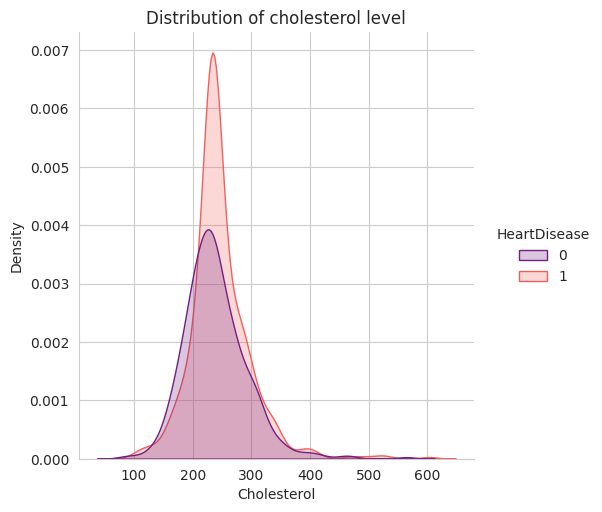

In [ ]:
sns.displot(data=df,x='Cholesterol',hue='HeartDisease',palette='magma',kind='kde',fill=True)
plt.title('Distribution of cholesterol level' )

#### Distribution of maximum heart rate achieved by HeartDisease:

Text(0.5, 1.0, 'Distribution of maximum heart rate')

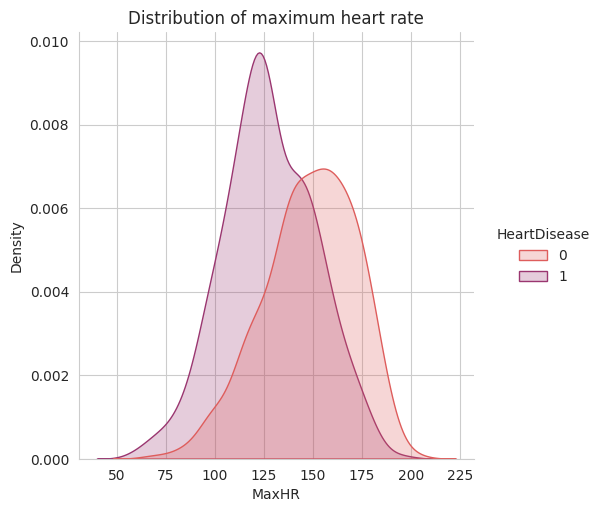

In [ ]:
sns.displot(data=df,x='MaxHR',hue='HeartDisease',palette='flare',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate')

#### What is the effect of fasting blood sugar on disease ?

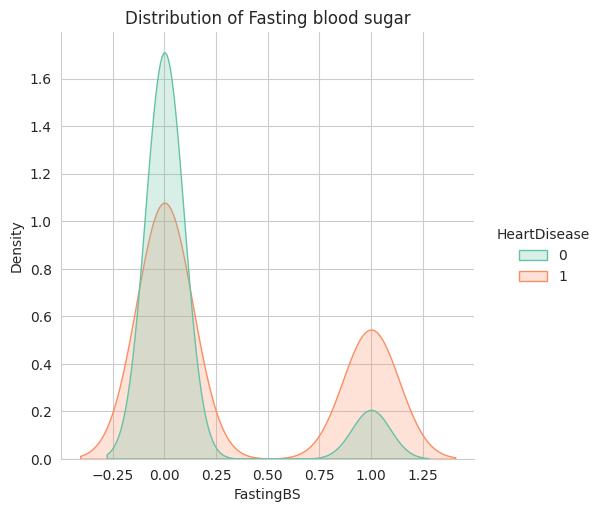

In [ ]:
sns.displot(data=df,x='FastingBS',hue='HeartDisease',palette='Set2',kind='kde',fill=True)
plt.xlabel('FastingBS')
plt.title('Distribution of Fasting blood sugar');

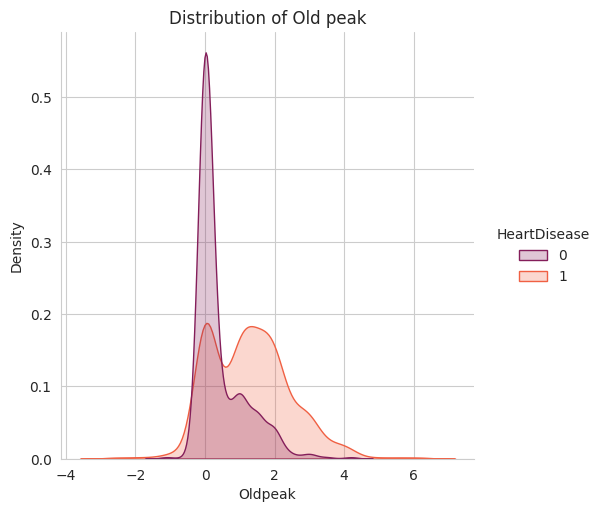

In [ ]:
sns.displot(data=df,x='Oldpeak',hue='HeartDisease',palette='rocket',kind='kde',fill=True)
plt.xlabel('Oldpeak')
plt.title('Distribution of Old peak');

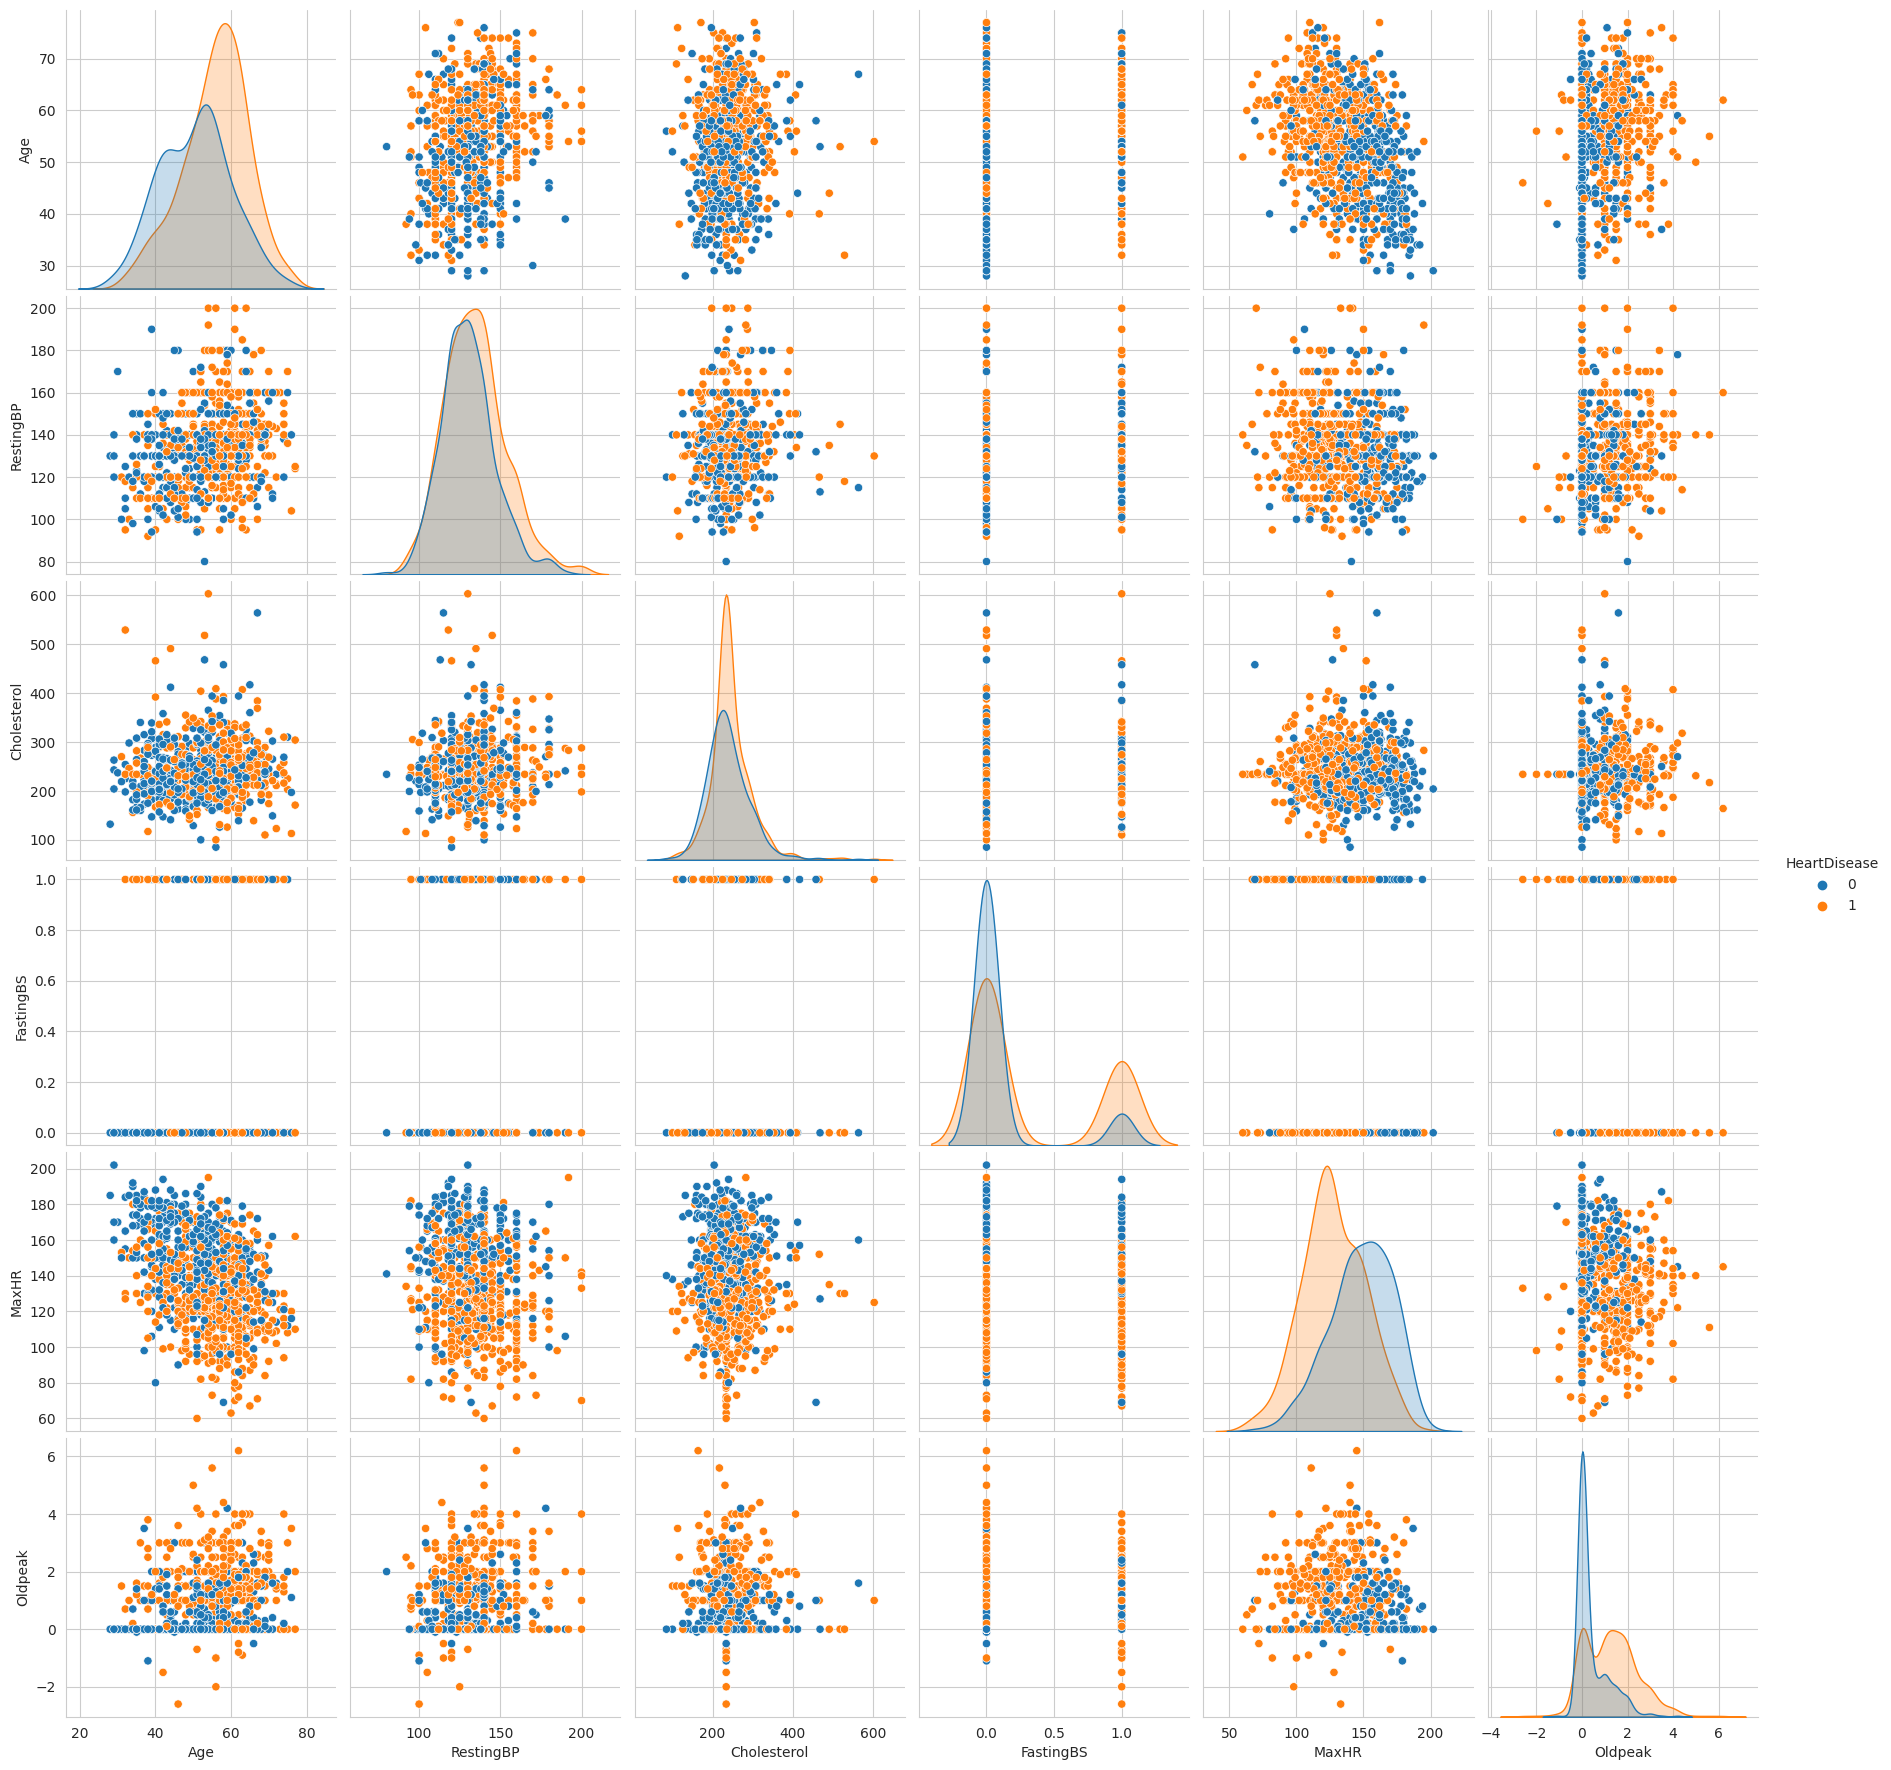

In [ ]:
numerical = df.select_dtypes('number').copy()
sns.set_style('whitegrid');
sns.pairplot(numerical, hue='HeartDisease', height=3);
plt.show();

### 10) Correlation:

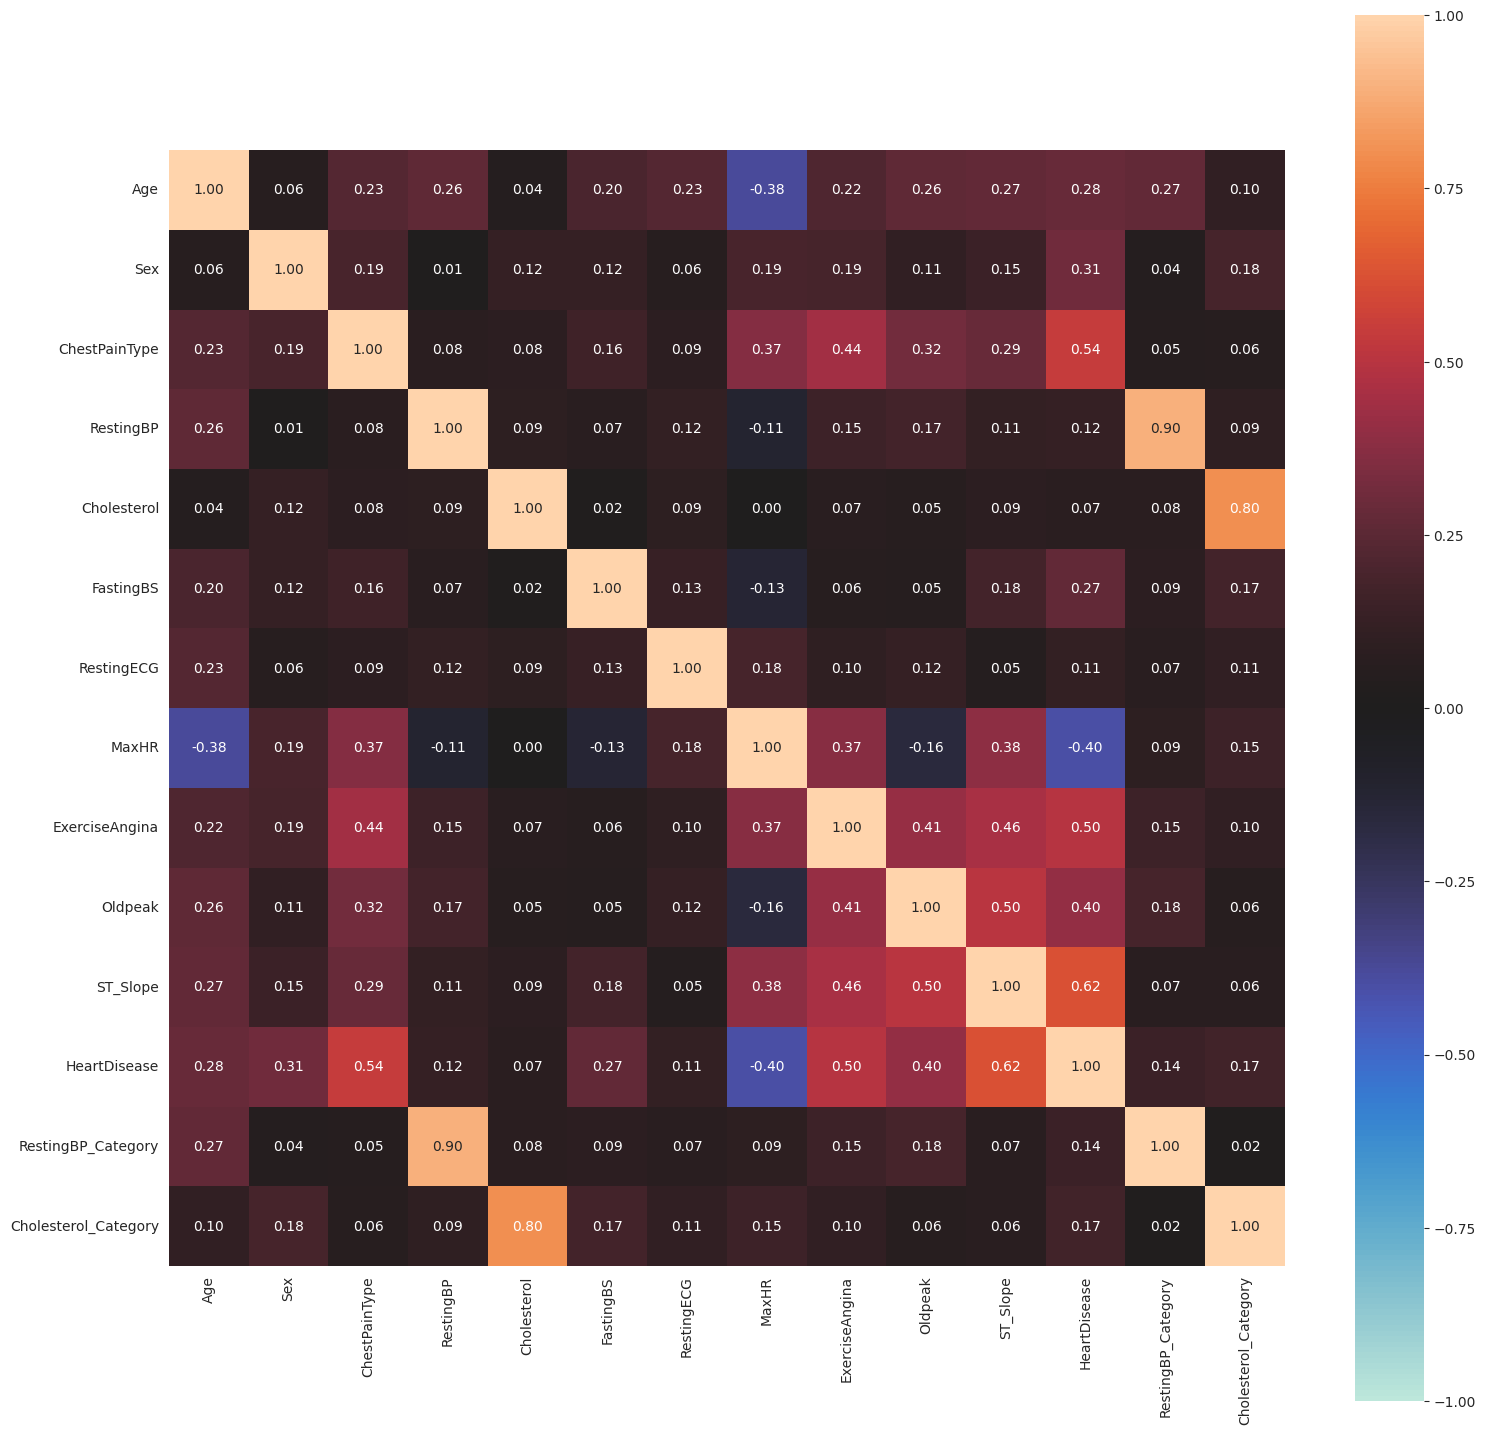

In [ ]:
!pip install dython
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features = identify_nominal_columns(df)

associations(df,
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True,
            compute_only=False, clustering=False, title=None, filename=None,
            figsize=(18,18));

### 11) Pre-processing:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

#### Numerical features:

In [ ]:
#Identify the features (X) and target (y)
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])

In [ ]:
#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
155   56   M           ASY        155          342          1     Normal   
362   56   M           NAP        155          234          0         ST   
869   59   M           NAP        150          212          1     Normal   
101   51   M           ASY        130          179          0     Normal   
199   57   F            TA        130          308          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope    RestingBP_Category  \
155    150              Y      3.0     Flat  Hypertension_Stage_2   
362     99              N      0.0     Flat  Hypertension_Stage_2   
869    157              N      1.6       Up  Hypertension_Stage_2   
101    100              N      0.0       Up  Hypertension_Stage_1   
199     98              N      1.0     Flat  Hypertension_Stage_1   

    Cholesterol_Category  
155                 High  
362           Borderline  
869           Borderline  
101               Normal  
199                 High

In [ ]:
#Create list of column names for numeric columns
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
scaler = StandardScaler()

Numeric Columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


In [ ]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', scaler, num_cols)
num_tuple

('numeric',
 StandardScaler(),
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object'))

#### Nominal features:

In [ ]:
nomi_cols = X_train.select_dtypes('object')
nomi_cols.head(1)

Sex ChestPainType RestingECG ExerciseAngina ST_Slope  \
155   M           ASY     Normal              Y     Flat   

       RestingBP_Category Cholesterol_Category  
155  Hypertension_Stage_2                 High

In [ ]:
nomi_cols = X_train.select_dtypes('object').drop(columns= ['Cholesterol_Category']).columns
print("Nominal OneHotEncoder Columns:", nomi_cols)
nomi_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Nominal OneHotEncoder Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'RestingBP_Category'],
      dtype='object')


In [ ]:
# Making a ohe_tuple for ColumnTransformer
nomi_tuple = ('nomi categorical', nomi_encoder, nomi_cols)
nomi_tuple

('nomi categorical',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
        'RestingBP_Category'],
       dtype='object'))

#### Ordinal Features:

In [ ]:
df['Cholesterol_Category'].value_counts()

Borderline    393
High          373
Normal        150
Name: Cholesterol_Category, dtype: int64

In [ ]:
# Defining lists of ordinal features
ord_cols = ['Cholesterol_Category']
# Specifying the order of categories in quality/condition columns
impute_na_ord = SimpleImputer(strategy= 'most_frequent')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['High','Borderline','Normal']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
# Instantiate the Pipeline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['High', 'Borderline', 'Normal']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# Making a ohe_tuple for ColumnTransformer
ord_tuple = ('ord categorical', ord_pipe, ord_cols)
ord_tuple

('ord categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['High', 'Borderline', 'Normal']])),
                 ('standardscaler', StandardScaler())]),
 ['Cholesterol_Category'])

In [ ]:
#Instantiate the ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, nomi_tuple, ord_tuple],verbose_feature_names_out=False, remainder='passthrough')

In [ ]:
X_train.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
155   56   M           ASY        155          342          1     Normal   
362   56   M           NAP        155          234          0         ST   
869   59   M           NAP        150          212          1     Normal   
101   51   M           ASY        130          179          0     Normal   
199   57   F            TA        130          308          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope    RestingBP_Category  \
155    150              Y      3.0     Flat  Hypertension_Stage_2   
362     99              N      0.0     Flat  Hypertension_Stage_2   
869    157              N      1.6       Up  Hypertension_Stage_2   
101    100              N      0.0       Up  Hypertension_Stage_1   
199     98              N      1.0     Flat  Hypertension_Stage_1   

    Cholesterol_Category  
155                 High  
362           Borderline  
869           Borderline  
101               Normal  
199                 High

In [ ]:
#Fit the Transformer on Training Data Only
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                ('nomi categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'RestingBP_Category'],
      dtype='object')),
                                ('ord categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['High',
                                                                              'Borderline',
                                                                              'Normal']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Cholesterol_Category'])],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_F  \
155  0.247343   1.274860     1.852778   1.844952  0.550076  1.917754    0.0   
362  0.247343   1.274860    -0.194838  -0.542020 -1.478661 -0.830849    0.0   
869  0.566351   0.990832    -0.611944   1.844952  0.828530  0.635073    0.0   
101 -0.284337  -0.145280    -1.237605  -0.542020 -1.438882 -0.830849    0.0   
199  0.353679  -0.145280     1.208158  -0.542020 -1.518441  0.085352    1.0   

     Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  ExerciseAngina_Y  \
155    1.0                1.0                0.0  ...               1.0   
362    1.0                0.0                0.0  ...               0.0   
869    1.0                0.0                0.0  ...               0.0   
101    1.0                1.0                0.0  ...               0.0   
199    0.0                0.0                0.0  ...               0.0   

     ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  \
155            0.0            1.0          0.0   
362            0.0            1.0          0.0   
869            0.0            0.0          1.0   
101            0.0            0.0          1.0   
199            0.0            1.0          0.0   

     RestingBP_Category_Elevated_BP  RestingBP_Category_Hypertension_Stage_1  \
155                             0.0                                      0.0   
362                             0.0                                      0.0   
869                             0.0                                      0.0   
101                             0.0                                      1.0   
199                             0.0                                      1.0   

     RestingBP_Category_Hypertension_Stage_2  \
155                                      1.0   
362                                      1.0   
869                                      1.0   
101                                      0.0   
199                                      0.0   

     RestingBP_Category_Hypertensive_Crisis  RestingBP_Category_Normal_BP  \
155                                     0.0                           0.0   
362                                     0.0                           0.0   
869                                     0.0                           0.0   
101                                     0.0                           0.0   
199                                     0.0                           0.0   

     Cholesterol_Category  
155             -1.049757  
362              0.361560  
869              0.361560  
101              1.772878  
199             -1.049757  

[5 rows x 26 columns]

### 12) Prediction Model:

In [ ]:
# Importing the Keras Librabies and Packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

### Model 1:

In [ ]:
# create and compile the model
model = keras.Sequential()
model.add(Dense(10, input_dim=X_train_processed.shape[1],
          activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'bce', metrics = 'accuracy')

In [ ]:
# train the model and save the history
history = model.fit(X_train_processed, y_train,
          validation_split=.2,
          epochs = 10)

Epoch 1/10
18/18 [==============================] - 1s 13ms/step - loss: 0.7195 - accuracy: 0.4863 - val_loss: 0.7076 - val_accuracy: 0.5145
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5355 - val_loss: 0.6904 - val_accuracy: 0.5725
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6809 - accuracy: 0.5756 - val_loss: 0.6773 - val_accuracy: 0.6014
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.6120 - val_loss: 0.6637 - val_accuracy: 0.6159
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6430 - val_loss: 0.6485 - val_accuracy: 0.6667
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.6922 - val_loss: 0.6331 - val_accuracy: 0.7101
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7213 - val_loss: 0.6151 - val_accuracy: 0.7609
Epoch 8/10
18/18 [=

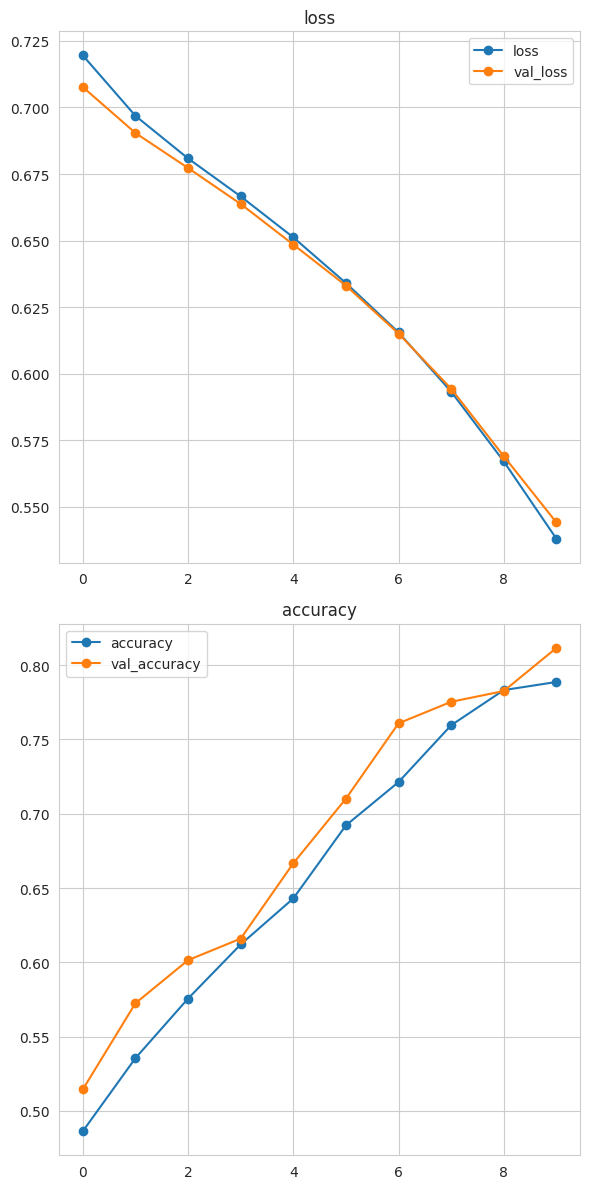

In [ ]:
plot_history(history);

In [ ]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7870


{'loss': 0.5555130243301392, 'accuracy': 0.7869565486907959}

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        90
           1       0.90      0.74      0.81       140

    accuracy                           0.79       230
   macro avg       0.79      0.80      0.78       230
weighted avg       0.81      0.79      0.79       230



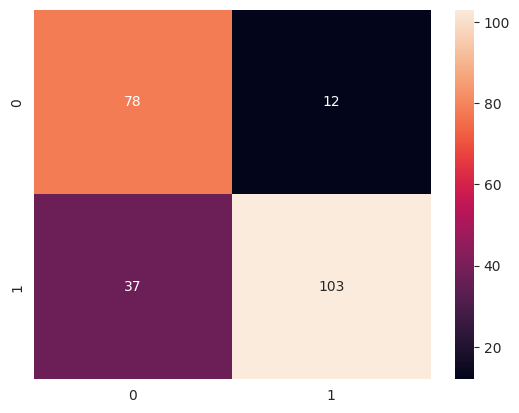

In [ ]:
# evaluate the model with sklearn metrics
test_preds = model.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');

### Model 2: add kernel_initializer='glorot_uniform'

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train_processed.shape[1]))
# Adding the Second Hidden Layer
classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train_processed,y_train,validation_split=0.2,batch_size=10,epochs = 10)

Epoch 1/10
55/55 [==============================] - 1s 4ms/step - loss: 0.7166 - accuracy: 0.5264 - val_loss: 0.6767 - val_accuracy: 0.5797
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6047 - val_loss: 0.6260 - val_accuracy: 0.6884
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7413 - val_loss: 0.5747 - val_accuracy: 0.7391
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.8160 - val_loss: 0.4991 - val_accuracy: 0.7899
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8452 - val_loss: 0.4512 - val_accuracy: 0.8188
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8506 - val_loss: 0.4347 - val_accuracy: 0.8261
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8579 - val_loss: 0.4290 - val_accuracy: 0.8333
Epoch 8/10
55/55 [==

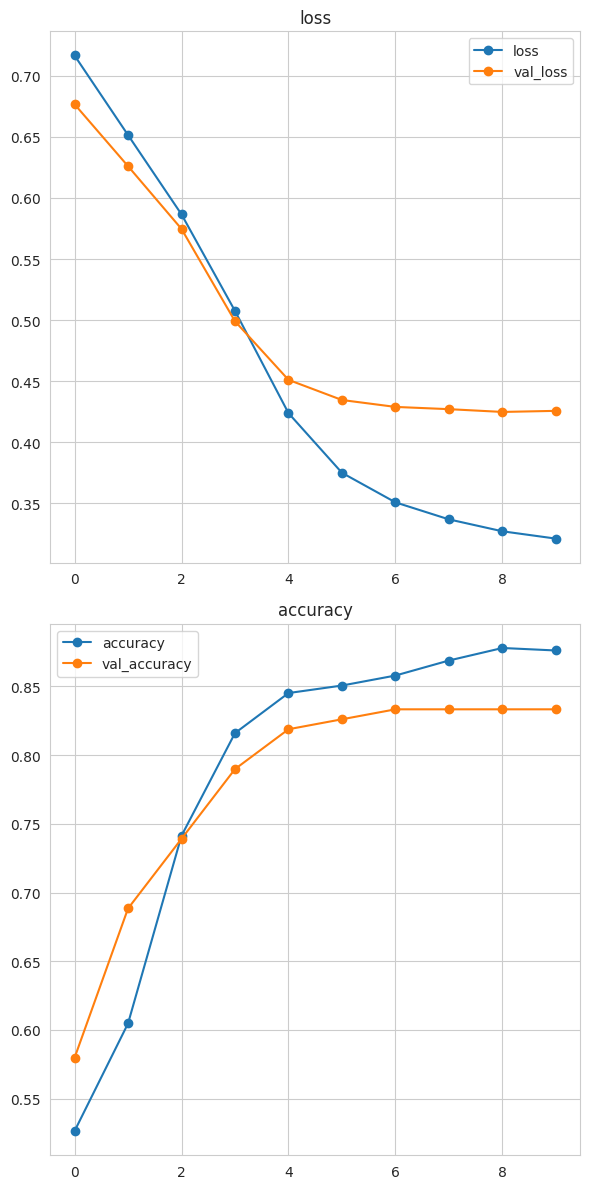

In [ ]:
plot_history(model_history);

In [ ]:
# Evaluate neural network with builtin evaluation
result = classifier.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8696


{'loss': 0.34501540660858154, 'accuracy': 0.8695651888847351}

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        90
           1       0.91      0.87      0.89       140

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



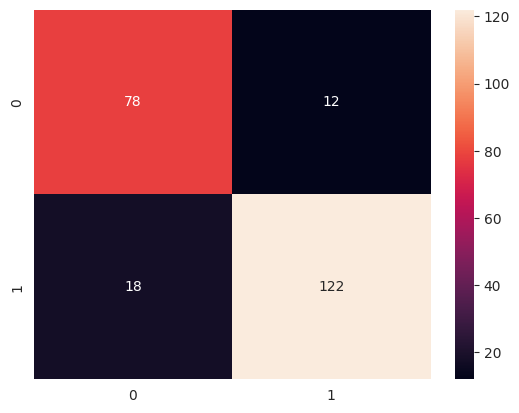

In [ ]:
# evaluate the model with sklearn metrics
test_preds = classifier.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');

### Model 3: add hidden layer and change the number of neurons in the input layer

In [ ]:
# Initializing the ANN
classifier2 = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier2.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train_processed.shape[1]))
# Adding the Second Hidden Layer
classifier2.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the third Hidden Layer
classifier2.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu'))
# Adding the output layer
classifier2.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history2 = classifier2.fit(X_train_processed,y_train,validation_split=0.2,batch_size=10,epochs = 10)

Epoch 1/10
55/55 [==============================] - 1s 4ms/step - loss: 0.7803 - accuracy: 0.4645 - val_loss: 0.7641 - val_accuracy: 0.4855
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5373 - val_loss: 0.7071 - val_accuracy: 0.5725
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6576 - val_loss: 0.6711 - val_accuracy: 0.6232
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7067 - val_loss: 0.6359 - val_accuracy: 0.6304
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7413 - val_loss: 0.6081 - val_accuracy: 0.6957
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7632 - val_loss: 0.5801 - val_accuracy: 0.7174
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.8069 - val_loss: 0.5575 - val_accuracy: 0.7609
Epoch 8/10
55/55 [==

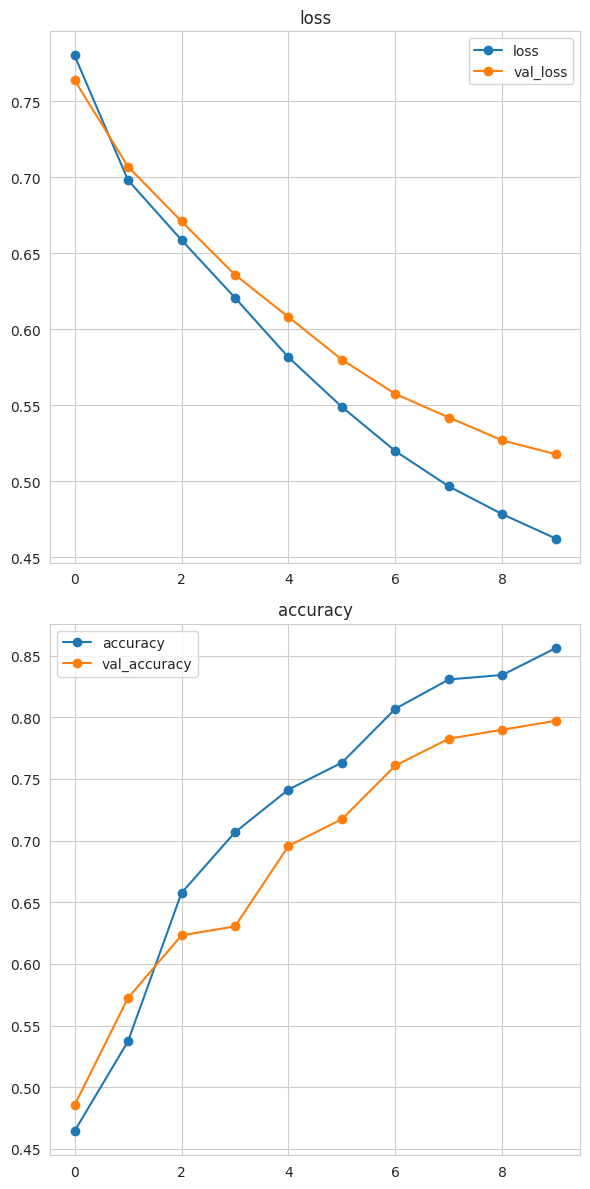

In [ ]:
plot_history(model_history2);

In [ ]:
# Evaluate neural network with builtin evaluation
result = classifier2.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.8261


{'loss': 0.5344693660736084, 'accuracy': 0.8260869383811951}

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        90
           1       0.92      0.79      0.85       140

    accuracy                           0.83       230
   macro avg       0.82      0.84      0.82       230
weighted avg       0.84      0.83      0.83       230



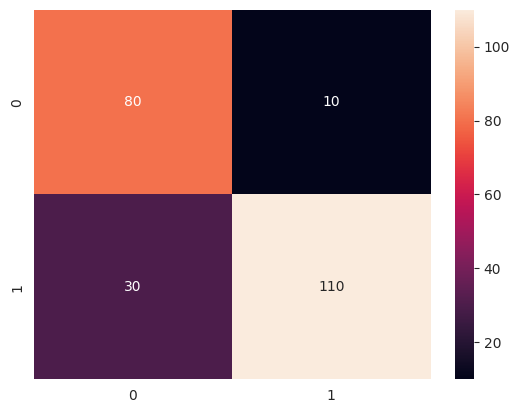

In [ ]:
# evaluate the model with sklearn metrics
test_preds = classifier2.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');

### Model 4: Adding Dropout Layer

In [ ]:
# Initializing the ANN
classifier3 = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier3.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train_processed.shape[1]))
# Adding the Second Hidden Layer
classifier3.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu'))
classifier3.add(Dropout(.2))
# Adding the third Hidden Layer
classifier3.add(Dense(units=5,kernel_initializer='glorot_uniform',activation='relu'))
classifier3.add(Dropout(.1))
# Adding the output layer
classifier3.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history3 = classifier3.fit(X_train_processed,y_train,validation_split=0.2,batch_size=10,epochs = 10)

Epoch 1/10
55/55 [==============================] - 1s 4ms/step - loss: 0.6651 - accuracy: 0.5774 - val_loss: 0.6289 - val_accuracy: 0.6812
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7031 - val_loss: 0.6077 - val_accuracy: 0.7174
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7304 - val_loss: 0.5903 - val_accuracy: 0.7754
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7723 - val_loss: 0.5728 - val_accuracy: 0.8116
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7960 - val_loss: 0.5584 - val_accuracy: 0.7971
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.8160 - val_loss: 0.5453 - val_accuracy: 0.8116
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.8324 - val_loss: 0.5341 - val_accuracy: 0.8043
Epoch 8/10
55/55 [==

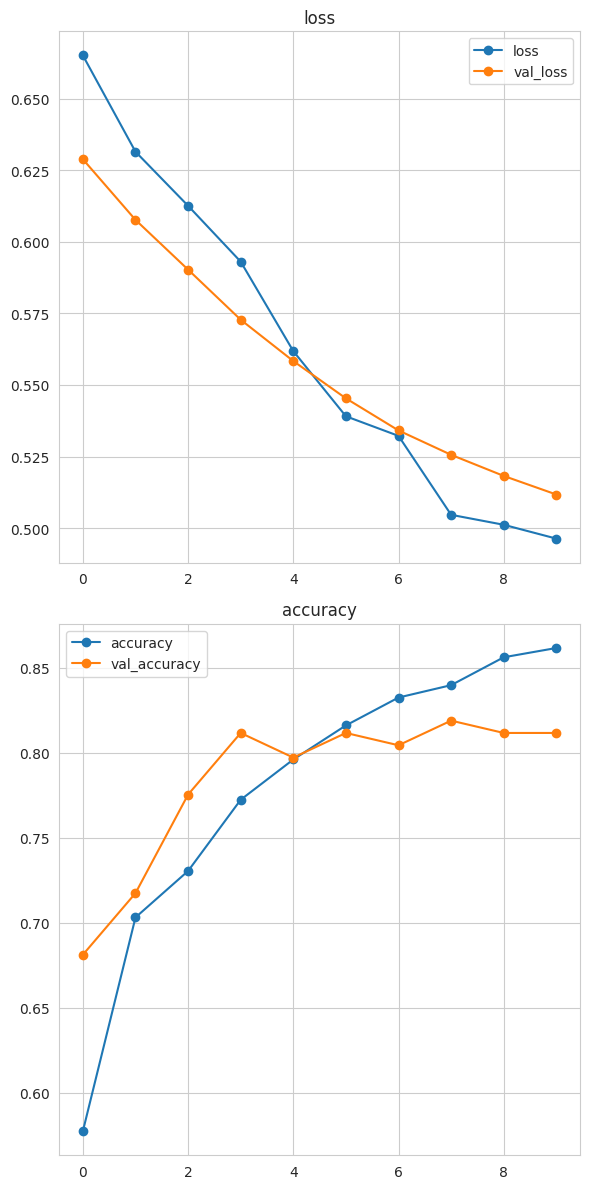

In [ ]:
plot_history(model_history3);

In [ ]:
# Evaluate neural network with builtin evaluation
result = classifier3.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8435


{'loss': 0.4483751058578491, 'accuracy': 0.843478262424469}

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        90
           1       0.89      0.85      0.87       140

    accuracy                           0.84       230
   macro avg       0.83      0.84      0.84       230
weighted avg       0.85      0.84      0.84       230



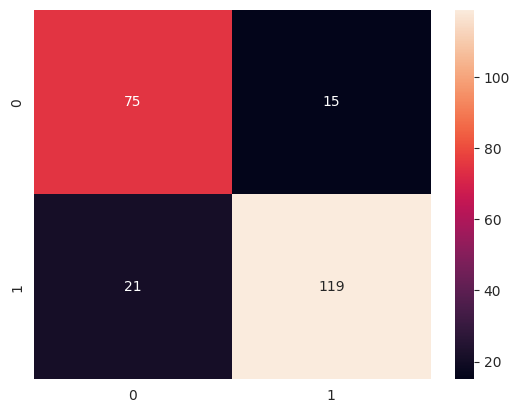

In [ ]:
# evaluate the model with sklearn metrics
test_preds = classifier3.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');

### Model 5: Early Stopping + Use L1 or L2 Kernel Regularization

In [ ]:
from keras import regularizers
from keras.callbacks import EarlyStopping

# Initializing the ANN
classifier4 = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier4.add(Dense(units=5,activation='relu',input_dim=X_train_processed.shape[1],kernel_regularizer=regularizers.l1_l2(l1=.01, l2=.01)))
# Adding the Second Hidden Layer
classifier4.add(Dense(units=5,activation='relu',kernel_regularizer=regularizers.l1(.01)))
classifier4.add(Dropout(.2))
# Adding the third Hidden Layer
classifier4.add(Dense(units=5,activation='relu',kernel_regularizer=regularizers.l1(.01)))
classifier4.add(Dropout(.1))
# Adding the output layer
classifier4.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Compile your model, to use our custom function, set metrics = ['acc']
classifier4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

# fit your model
history4 = classifier4.fit(X_train_processed,y_train,validation_split=0.2,batch_size=10,epochs = 53,callbacks=[EarlyStopping(patience=2)])

Epoch 1/53
55/55 [==============================] - 1s 5ms/step - loss: 1.2002 - acc: 0.5501 - val_loss: 1.1497 - val_acc: 0.6014
Epoch 2/53
55/55 [==============================] - 0s 2ms/step - loss: 1.0938 - acc: 0.6539 - val_loss: 1.0499 - val_acc: 0.6884
Epoch 3/53
55/55 [==============================] - 0s 2ms/step - loss: 0.9877 - acc: 0.7067 - val_loss: 0.9498 - val_acc: 0.7536
Epoch 4/53
55/55 [==============================] - 0s 2ms/step - loss: 0.9011 - acc: 0.7596 - val_loss: 0.8638 - val_acc: 0.7899
Epoch 5/53
55/55 [==============================] - 0s 2ms/step - loss: 0.8094 - acc: 0.8015 - val_loss: 0.7890 - val_acc: 0.8188
Epoch 6/53
55/55 [==============================] - 0s 2ms/step - loss: 0.7457 - acc: 0.7960 - val_loss: 0.7247 - val_acc: 0.8188
Epoch 7/53
55/55 [==============================] - 0s 2ms/step - loss: 0.6904 - acc: 0.8087 - val_loss: 0.6711 - val_acc: 0.8261
Epoch 8/53
55/55 [==============================] - 0s 2ms/step - loss: 0.6368 - acc: 0.82

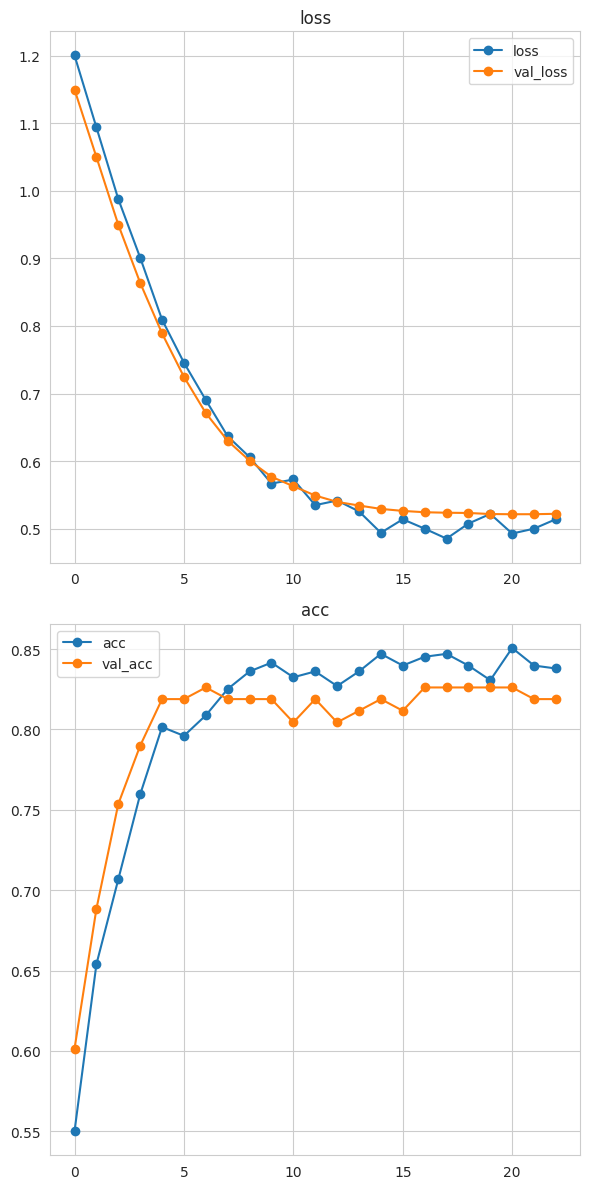

In [ ]:
plot_history(history4);

In [ ]:
# Evaluate neural network with builtin evaluation
result = classifier4.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 [==============================] - 0s 1ms/step - loss: 0.4806 - acc: 0.8739


{'loss': 0.4806136190891266, 'acc': 0.873913049697876}

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        90
           1       0.93      0.86      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



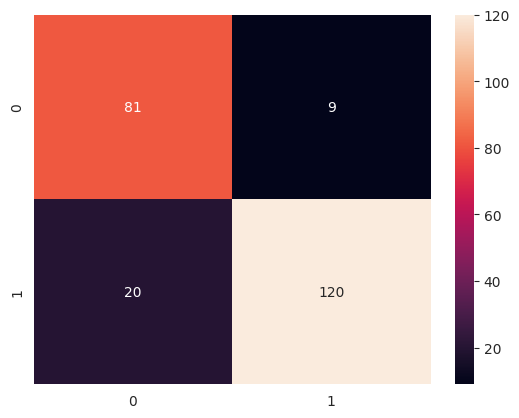

In [ ]:
# evaluate the model with sklearn metrics
test_preds = classifier4.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');

### Model 6: Use L1 or L2 Kernel Regularization

In [ ]:
# Initializing the ANN
classifier5 = Sequential()
# Adding the Input layer and the First Hidden Layer
classifier5.add(Dense(units=5,activation='relu',input_dim=X_train_processed.shape[1],kernel_regularizer=regularizers.l1_l2(l1=.01, l2=.01)))
# Adding the Second Hidden Layer
classifier5.add(Dense(units=5,activation='relu',kernel_regularizer=regularizers.l1(.01)))
classifier5.add(Dropout(.2))
# Adding the third Hidden Layer
classifier5.add(Dense(units=5,activation='relu',kernel_regularizer=regularizers.l1(.01)))
classifier5.add(Dropout(.1))
# Adding the output layer
classifier5.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Compile your model, to use our custom function, set metrics = ['acc']
classifier5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

# fit your model
history5 = classifier5.fit(X_train_processed,y_train,validation_split=0.2,batch_size=10,epochs = 53)

Epoch 1/53
55/55 [==============================] - 1s 4ms/step - loss: 1.2175 - acc: 0.4517 - val_loss: 1.1487 - val_acc: 0.5072
Epoch 2/53
55/55 [==============================] - 0s 2ms/step - loss: 1.1139 - acc: 0.5556 - val_loss: 1.0633 - val_acc: 0.6087
Epoch 3/53
55/55 [==============================] - 0s 2ms/step - loss: 1.0381 - acc: 0.5938 - val_loss: 0.9914 - val_acc: 0.7101
Epoch 4/53
55/55 [==============================] - 0s 2ms/step - loss: 0.9653 - acc: 0.6521 - val_loss: 0.9297 - val_acc: 0.7609
Epoch 5/53
55/55 [==============================] - 0s 2ms/step - loss: 0.8980 - acc: 0.7104 - val_loss: 0.8723 - val_acc: 0.7826
Epoch 6/53
55/55 [==============================] - 0s 2ms/step - loss: 0.8692 - acc: 0.6794 - val_loss: 0.8245 - val_acc: 0.7826
Epoch 7/53
55/55 [==============================] - 0s 2ms/step - loss: 0.8120 - acc: 0.7213 - val_loss: 0.7770 - val_acc: 0.8043
Epoch 8/53
55/55 [==============================] - 0s 2ms/step - loss: 0.7671 - acc: 0.74

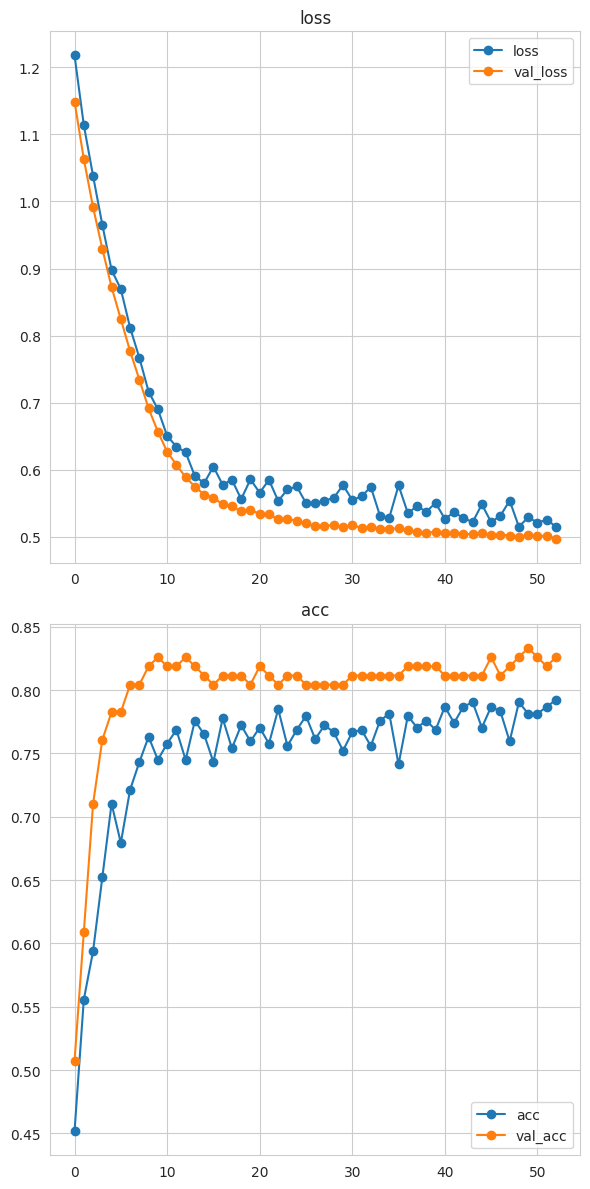

In [ ]:
plot_history(history5);

In [ ]:
# Evaluate neural network with builtin evaluation
result = classifier5.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 [==============================] - 0s 2ms/step - loss: 0.4586 - acc: 0.8783


{'loss': 0.45857498049736023, 'acc': 0.8782608509063721}

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        90
           1       0.91      0.89      0.90       140

    accuracy                           0.88       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230



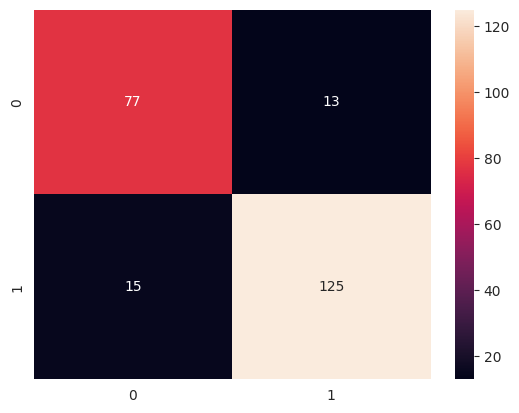

In [ ]:
# evaluate the model with sklearn metrics
test_preds = classifier5.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');